In [63]:
from petastorm import make_reader
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew
from scipy.signal import periodogram
import scipy.signal
from ecgdetectors import Detectors
import matplotlib.ticker as ticker
import pywt
#import pandas as pd



In [33]:
##Read the dataset
path_formatted_glasgow = "/workspaces/maitrise/data/20220902_data_physio_formatted_merged/merged/dataParquet"
path_petastorm = f"file:///{path_formatted_glasgow}"
with make_reader(path_petastorm) as reader:
    for sample in reader:
        data = sample
        break


/home/vscode/.local/lib/python3.8/site-packages/petastorm/fs_utils.py:88: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
  self._filesystem = pyarrow.localfs
/home/vscode/.local/lib/python3.8/site-packages/petastorm/etl/dataset_metadata.py:402: FutureWarning: Specifying the 'metadata_nthreads' argument is deprecated as of pyarrow 8.0.0, and the argument will be removed in a future version
  dataset = pq.ParquetDataset(path_or_paths, filesystem=fs, validate_schema=False, metadata_nthreads=10)
/home/vscode/.local/lib/python3.8/site-packages/petastorm/etl/dataset_metadata.py:362: FutureWarning: 'ParquetDataset.common_metadata' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version.
  if not dataset.common_metadata:
/home/vscode/.local/lib/python3.8/site-packages/petastorm/etl/dataset_metadata.py:368: FutureWarning: 'ParquetDataset.common_metadata' attribute is deprecated as of pyarrow 5.0.0 and will be 

In [36]:
print(data)

ECGSchema_view(noun_id=b'A4857', signal_names=array([b'I', b'II', b'III', b'aVR', b'aVL', b'aVF', b'V1', b'V2', b'V3',
       b'V4', b'V5', b'V6'], dtype='|S3'), signal=array([[-0.021, -0.101, -0.08 , ..., -0.01 , -0.037, -0.035],
       [-0.03 , -0.142, -0.112, ..., -0.016, -0.053, -0.041],
       [-0.029, -0.125, -0.096, ..., -0.015, -0.043, -0.02 ],
       ...,
       [ 0.   , -0.089, -0.09 , ...,  0.019, -0.014, -0.013],
       [ 0.005, -0.079, -0.084, ...,  0.026, -0.004, -0.003],
       [ 0.011, -0.086, -0.096, ...,  0.033,  0.004,  0.002]],
      dtype=float32), diagnostics=array([270492004]), score_classes=array([270492004]), signal_length=5000, sampling_frequency=500, age=77, sex=b'Male')


In [37]:
ECG_signal = data.signal
ECG_lead = data.signal_names
dico_ECG = {}
for i,j in zip(ECG_lead,range(12)):
    
     dico_ECG[i] = ECG_signal[:,j]


In [ ]:
##Kurtosis SQI factor :
def kurtosis_SQI(signal):
    return kurtosis(signal)

##Skewness SQI factor:
def Skewness_SQI(signal):
    return skew(signal)

for i in ECG_lead:
    print(f"for lead {i.decode('utf8')} : ")
    for j in range(5):
        print("Kurtosis = ",kurtosis_SQI(dico_ECG[i][j*1000:(1000)*(j+1)]), " and Skewness = ", Skewness_SQI(dico_ECG[i][j*1000:(1000)*(j+1)]))
    plt.plot(dico_ECG[i])
    plt.grid()
    plt.title(f"lead {i.decode('utf8')}")
    plt.show()

for lead I between [0,1000]: 0.52218527
for lead I between [1000,2000]: 0.49673572
for lead I between [2000,3000]: 0.41511223
for lead I between [3000,4000]: 0.41685462
for lead I between [4000,5000]: 0.49223962


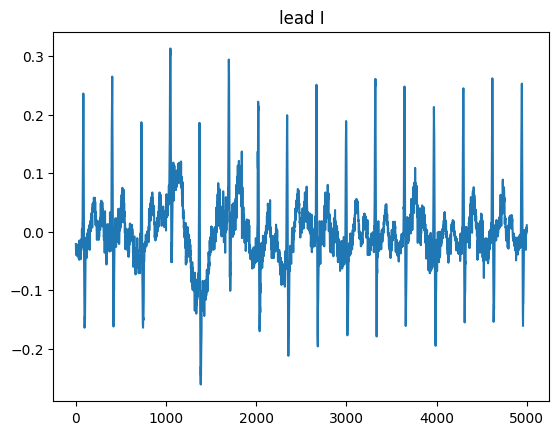

for lead II between [0,1000]: 0.50463915
for lead II between [1000,2000]: 0.4832163
for lead II between [2000,3000]: 0.3820336
for lead II between [3000,4000]: 0.440501
for lead II between [4000,5000]: 0.48293254


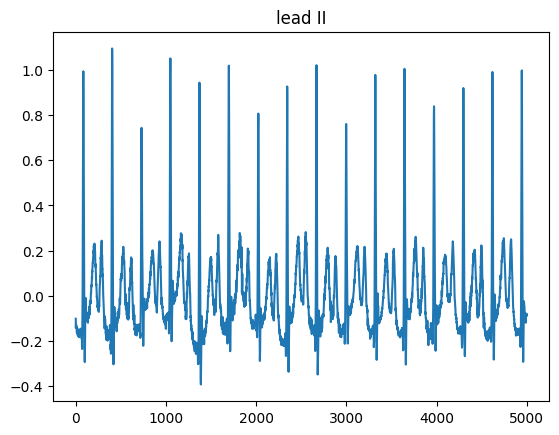

for lead III between [0,1000]: 0.53880197
for lead III between [1000,2000]: 0.51647735
for lead III between [2000,3000]: 0.41793644
for lead III between [3000,4000]: 0.47603184
for lead III between [4000,5000]: 0.5176781


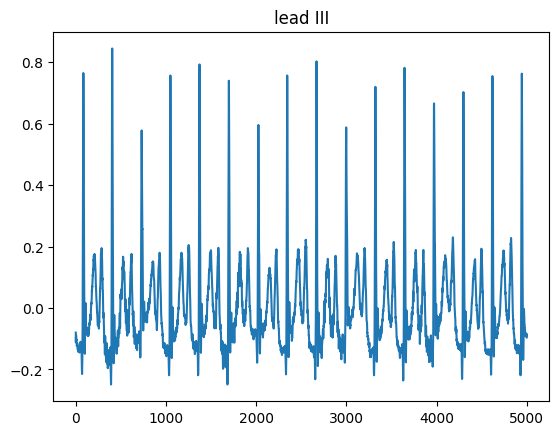

for lead aVR between [0,1000]: 0.4936272
for lead aVR between [1000,2000]: 0.4718534
for lead aVR between [2000,3000]: 0.3726433
for lead aVR between [3000,4000]: 0.4247973
for lead aVR between [4000,5000]: 0.47119787


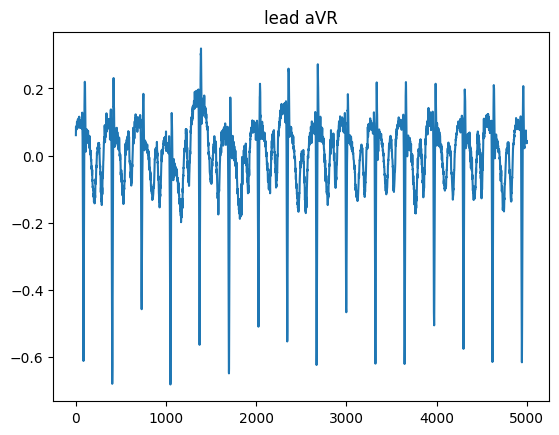

for lead aVL between [0,1000]: 0.6207834
for lead aVL between [1000,2000]: 0.59611464
for lead aVL between [2000,3000]: 0.517234
for lead aVL between [3000,4000]: 0.5448758
for lead aVL between [4000,5000]: 0.6021005


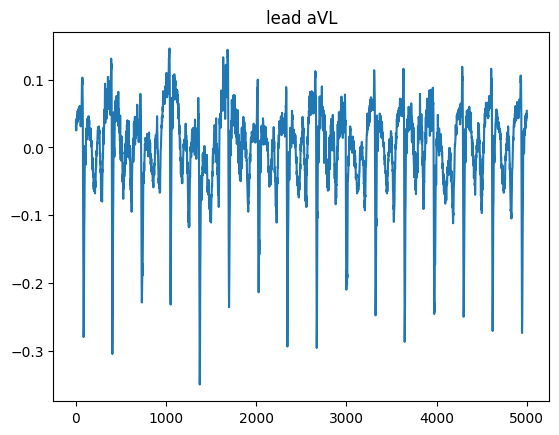

for lead aVF between [0,1000]: 0.5172378
for lead aVF between [1000,2000]: 0.49556747
for lead aVF between [2000,3000]: 0.394848
for lead aVF between [3000,4000]: 0.45467398
for lead aVF between [4000,5000]: 0.49597096


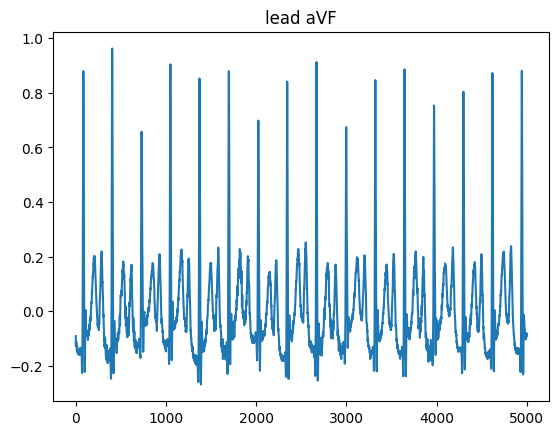

for lead V1 between [0,1000]: 0.64245766
for lead V1 between [1000,2000]: 0.628329
for lead V1 between [2000,3000]: 0.4930312
for lead V1 between [3000,4000]: 0.54515254
for lead V1 between [4000,5000]: 0.6436597


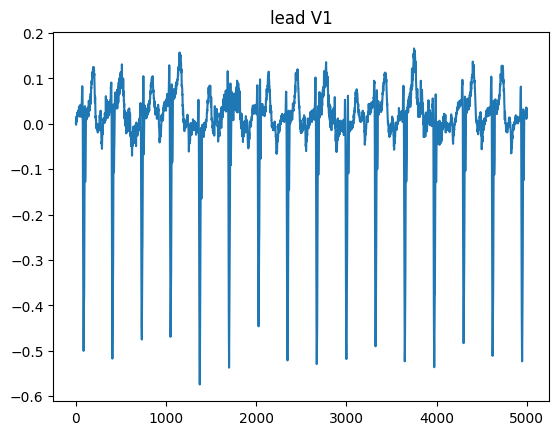

for lead V2 between [0,1000]: 0.78367424
for lead V2 between [1000,2000]: 0.7910068
for lead V2 between [2000,3000]: 0.73324037
for lead V2 between [3000,4000]: 0.70784765
for lead V2 between [4000,5000]: 0.7975673


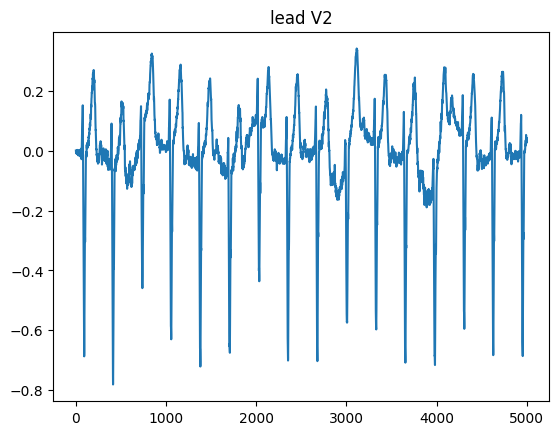

for lead V3 between [0,1000]: 0.6900278
for lead V3 between [1000,2000]: 0.7008145
for lead V3 between [2000,3000]: 0.6784514
for lead V3 between [3000,4000]: 0.6352232
for lead V3 between [4000,5000]: 0.71276724


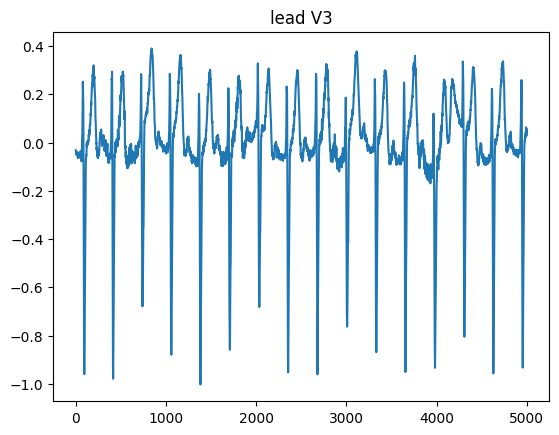

for lead V4 between [0,1000]: 0.599756
for lead V4 between [1000,2000]: 0.59980446
for lead V4 between [2000,3000]: 0.5704427
for lead V4 between [3000,4000]: 0.54026127
for lead V4 between [4000,5000]: 0.61401105


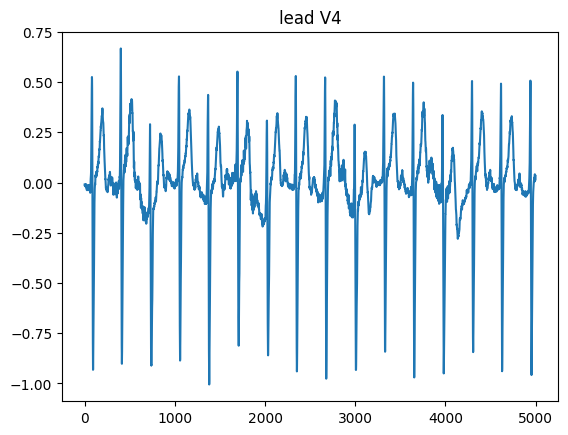

for lead V5 between [0,1000]: 0.5099128
for lead V5 between [1000,2000]: 0.5106134
for lead V5 between [2000,3000]: 0.46211612
for lead V5 between [3000,4000]: 0.47024846
for lead V5 between [4000,5000]: 0.5239342


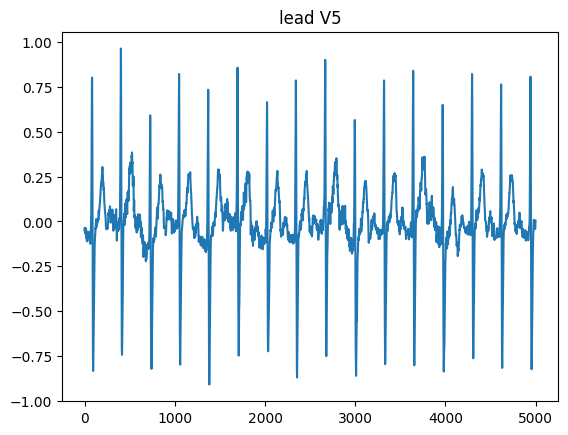

for lead V6 between [0,1000]: 0.47740763
for lead V6 between [1000,2000]: 0.48646447
for lead V6 between [2000,3000]: 0.39222676
for lead V6 between [3000,4000]: 0.4472446
for lead V6 between [4000,5000]: 0.5037271


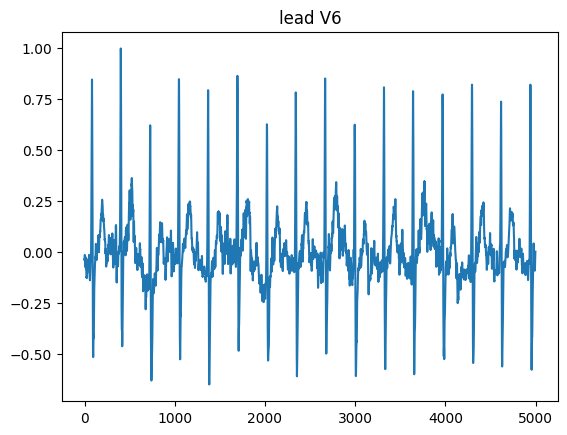

In [46]:
#SDR factor :

def SDR(signals,ECG_lead,fs = data.sampling_frequency):
    for i in ECG_lead:
        for j in range(5):
            f,PSD = periodogram(signals[i][j*1000:(1000)*(j+1)],fs)
            ECG_signal_PSD = np.sum(PSD[np.logical_and(f>5,f<14)])
            ECG_tot = np.sum(PSD[np.logical_and(f>5,f<50)])
            SDR_val = ECG_signal_PSD/ECG_tot
            print(f"for lead {i.decode('utf8')} between [{j*1000},{(j+1)*(1000)}]:",SDR_val)
        plt.plot(dico_ECG[i])
        plt.title(f"lead {i.decode('utf8')}")
        plt.show()
        #plt.semilogy(f, PSD)
        #plt.ylim([1e-7, 1e2])
        #plt.xlabel('frequency [Hz]')
        #plt.ylabel('PSD [V**2/Hz]')
        #plt.show()
        
SDR(dico_ECG,ECG_lead)       

[168, 319, 477, 680, 1035, 1357, 1576, 1729, 2032, 2341, 2677, 2995, 3350, 3641, 3983, 4323, 4616, 4968]


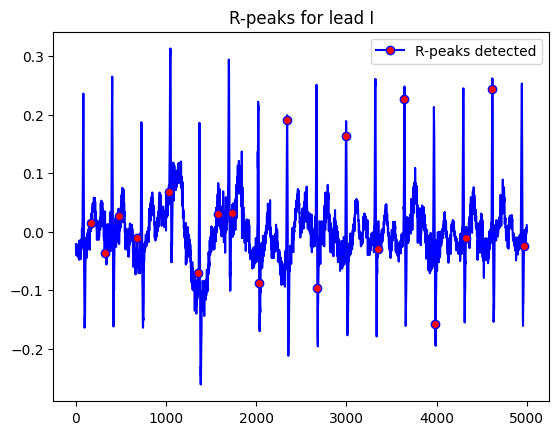

[324, 735, 1059, 1382, 1720, 2030, 2375, 2691, 3012, 3332, 3667, 3978, 4328, 4630, 4976]


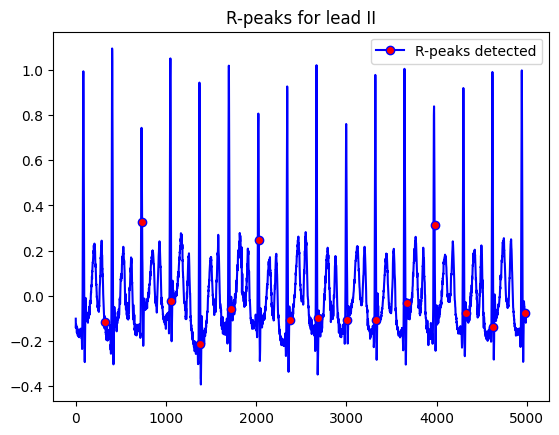

[301, 718, 1037, 1383, 1708, 2029, 2374, 2667, 3002, 3319, 3673, 3977, 4329, 4641, 4943]


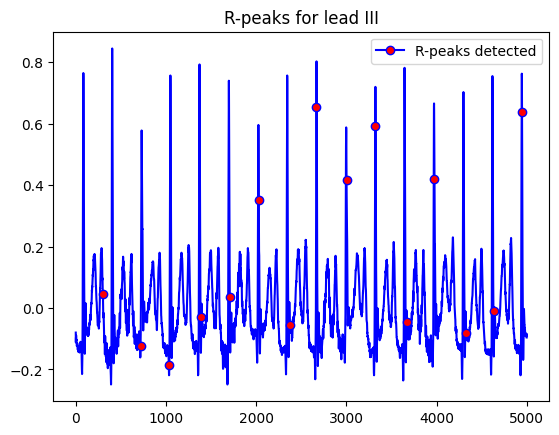

[315, 468, 717, 1058, 1399, 1708, 2021, 2354, 2678, 3006, 3346, 3642, 3985, 4307, 4629, 4955]


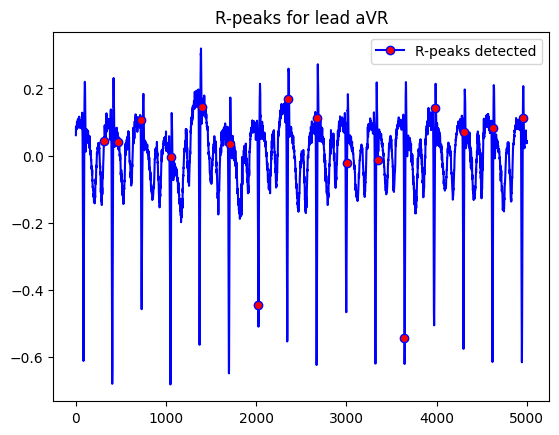

[281, 437, 719, 1038, 1361, 1590, 1742, 2039, 2333, 2659, 2987, 3326, 3634, 3929, 4287, 4631, 4934]


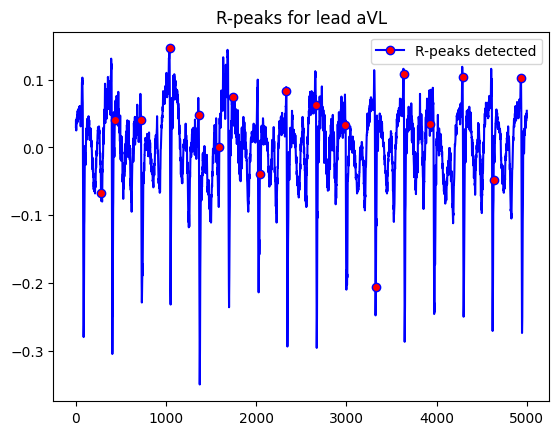

[158, 425, 735, 1059, 1383, 1720, 2030, 2380, 2679, 3003, 3342, 3666, 3969, 4310, 4641, 4956]


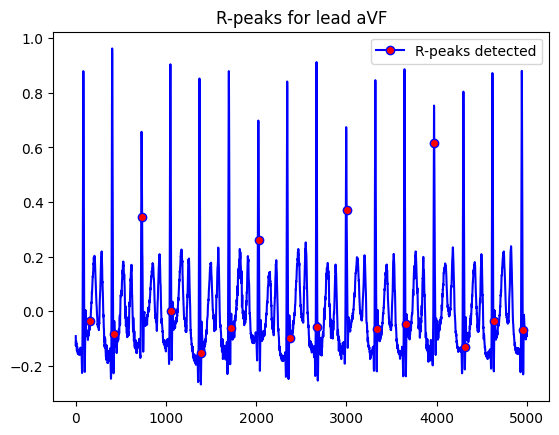

[161, 401, 727, 1046, 1397, 1685, 2045, 2346, 2667, 2995, 3340, 3645, 3974, 4332, 4621, 4971]


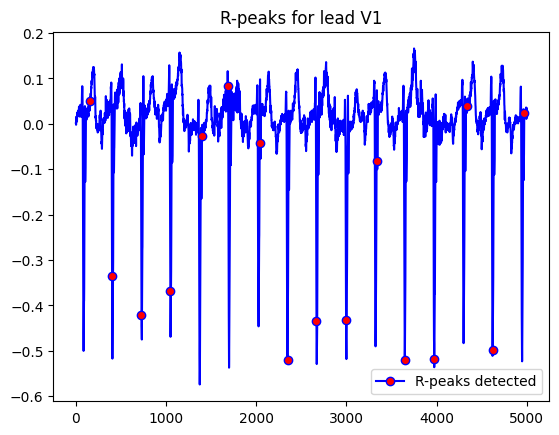

[314, 473, 734, 1066, 1361, 1688, 2050, 2336, 2693, 3003, 3310, 3657, 3977, 4303, 4631, 4950]


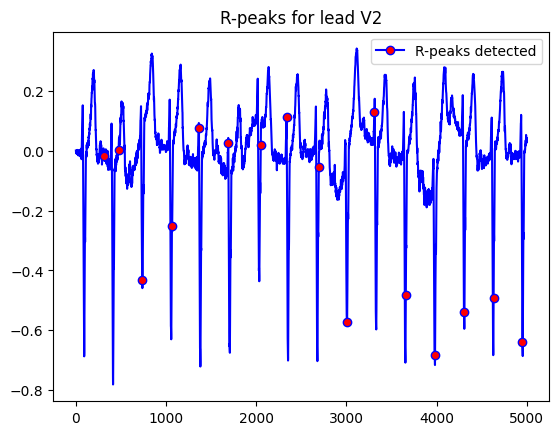

[334, 735, 1063, 1395, 1710, 2019, 2367, 2692, 3012, 3346, 3650, 3995, 4311, 4633, 4940]


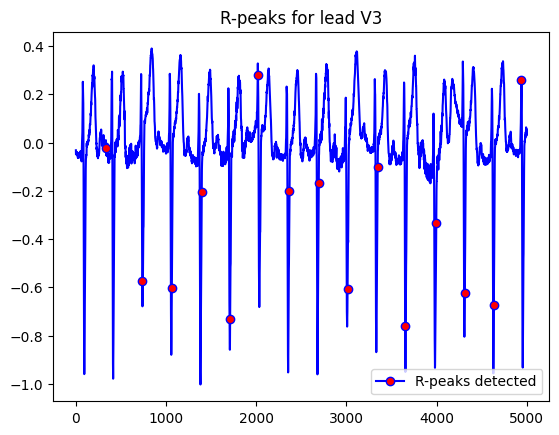

[166, 345, 735, 1072, 1395, 1711, 2041, 2350, 2691, 3012, 3347, 3681, 3986, 4321, 4643, 4983]


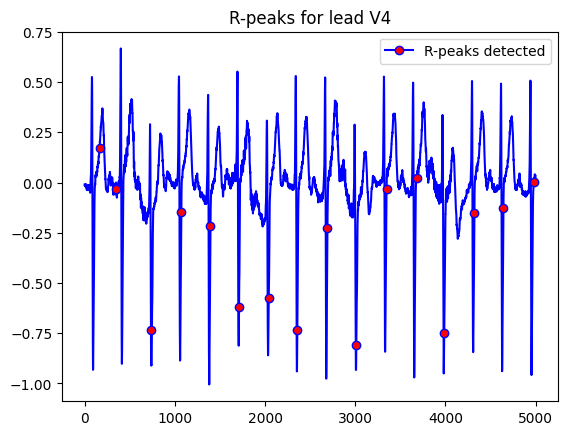

[326, 715, 1034, 1378, 1720, 2030, 2366, 2687, 2994, 3328, 3661, 3968, 4321, 4642, 4941]


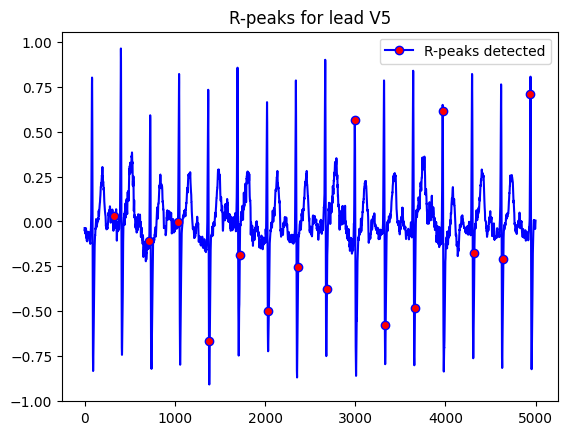

[272, 423, 736, 1045, 1395, 1712, 2030, 2340, 2676, 2995, 3328, 3659, 3968, 4329, 4634, 4952]


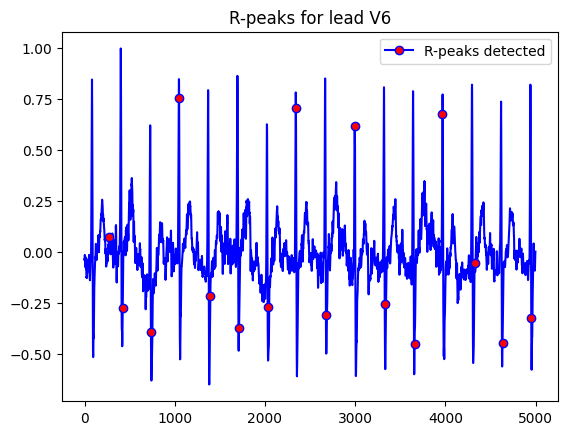

In [62]:
#Beats detector ECG
def QRS_detector(signal,lead,fs = data.sampling_frequency):
    detect = Detectors(fs)
    for i in lead:
        r_peaks = detect.swt_detector(signal[i])
        print(r_peaks)
        plt.plot(signal[i],marker = "o",markerfacecolor = "red",color = "b",markevery = r_peaks,label = "R-peaks detected")
        plt.legend()
        plt.title(f"R-peaks for lead {i.decode('utf-8')}")
        plt.show()

QRS_detector(dico_ECG,ECG_lead)

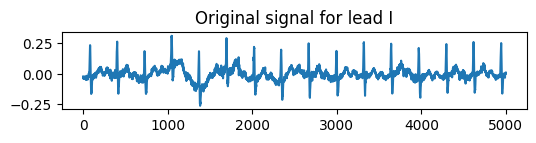

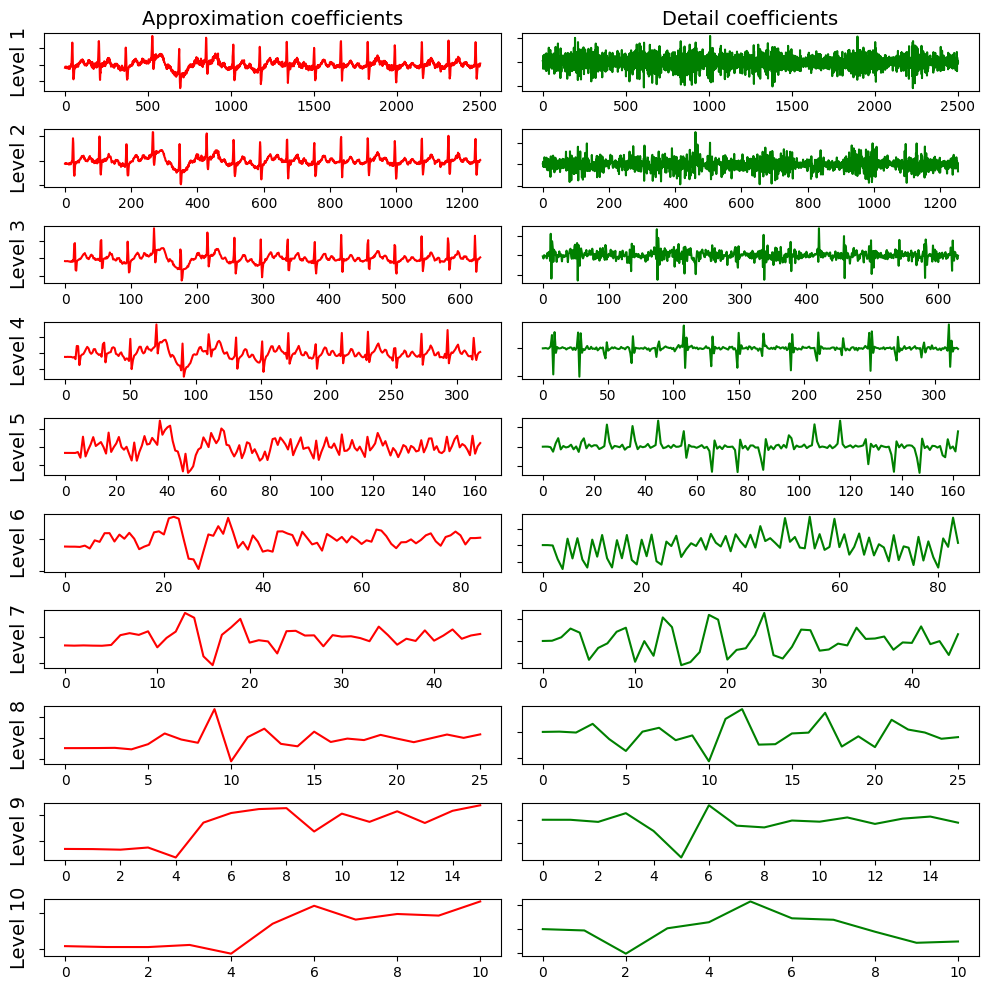

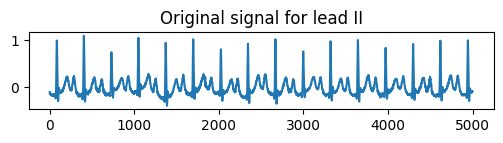

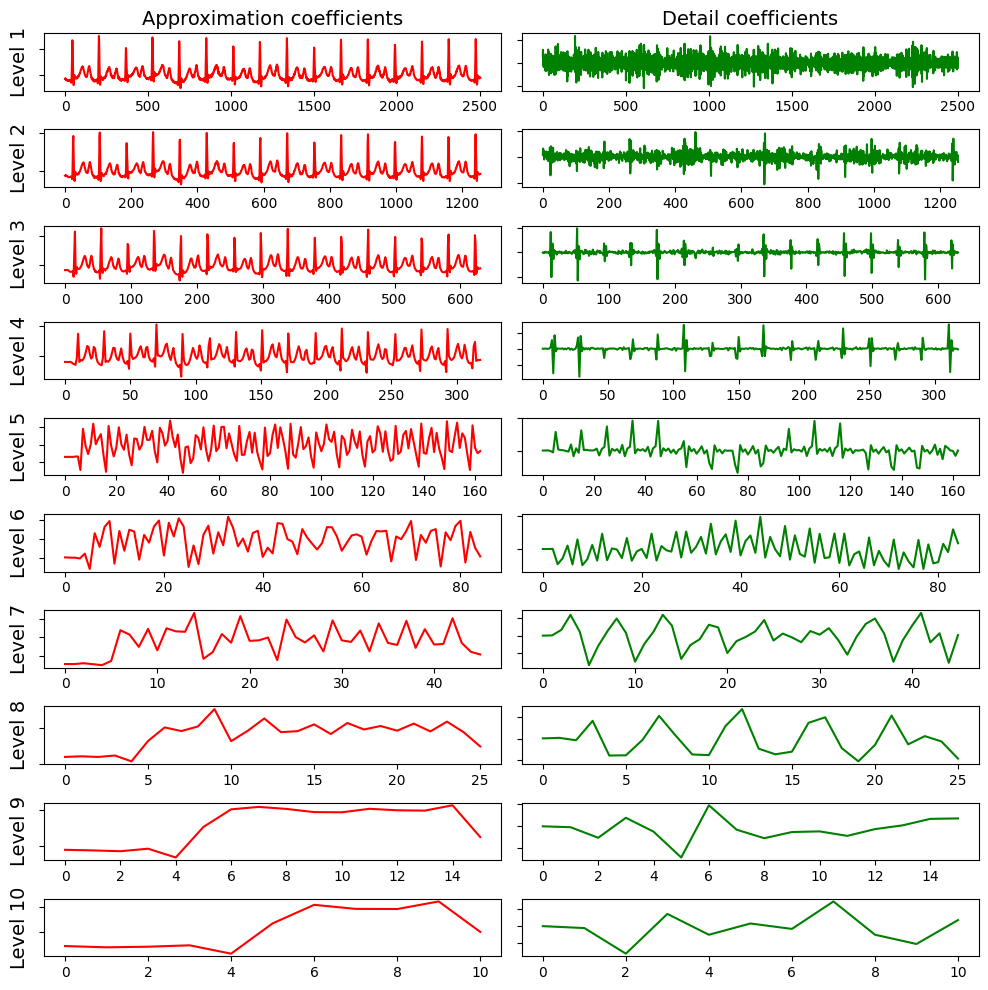

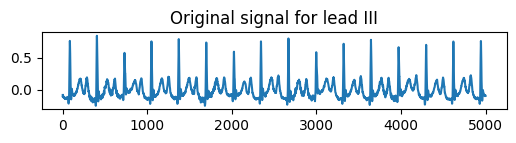

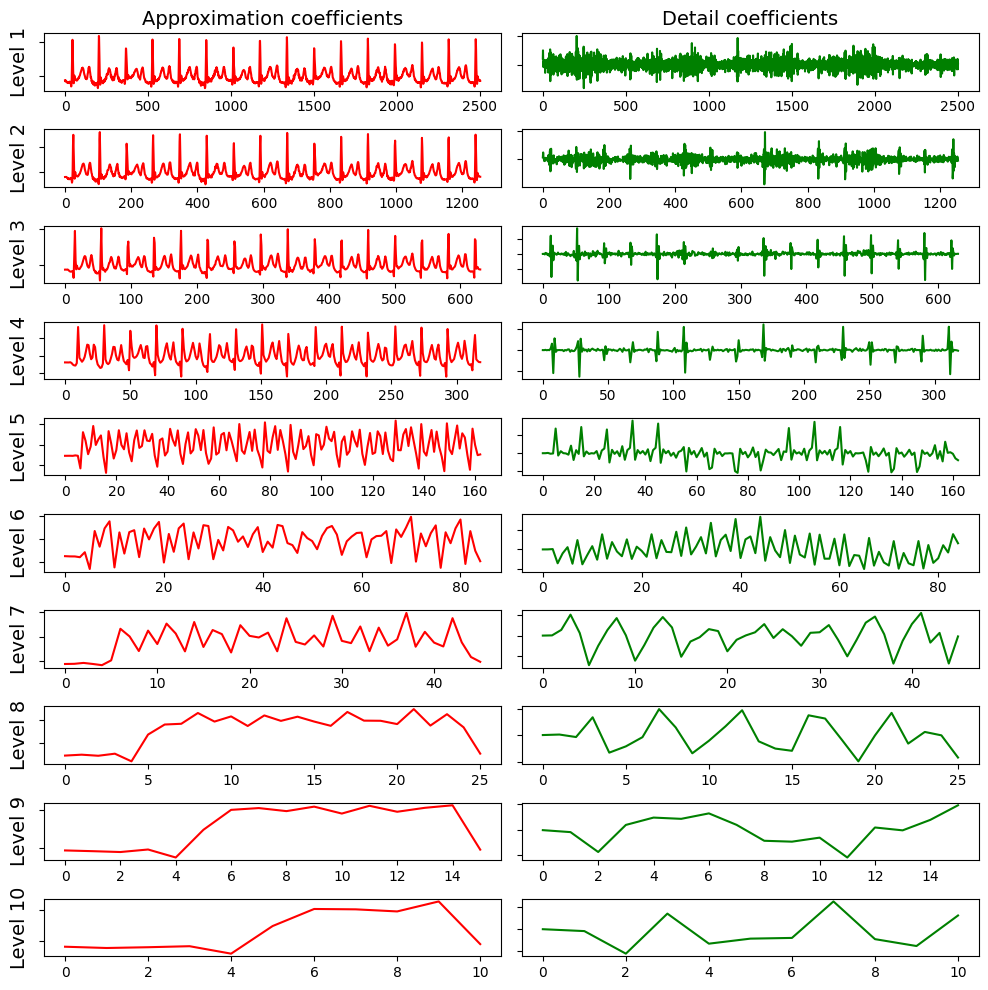

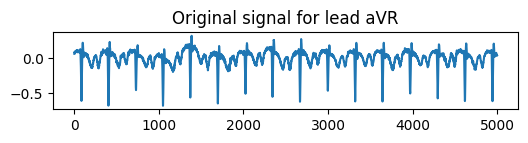

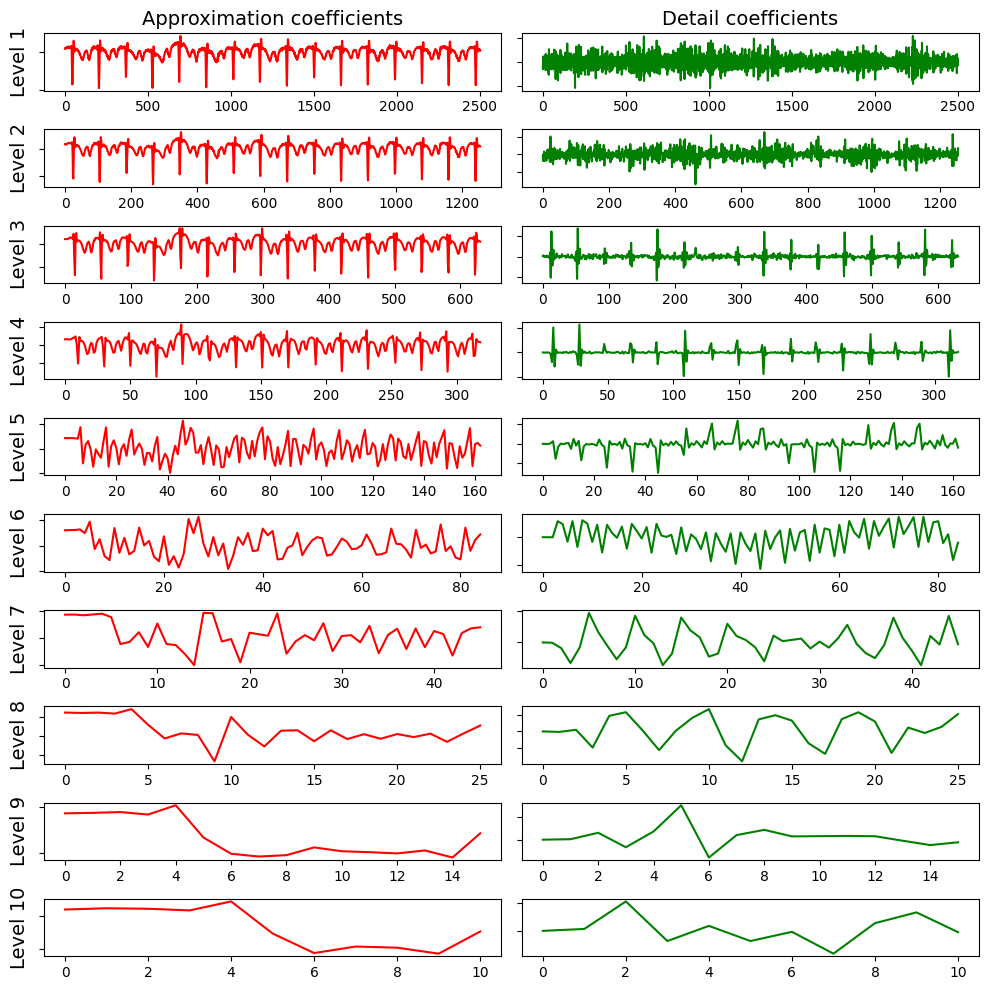

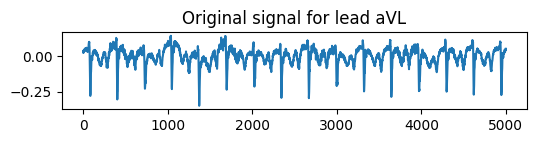

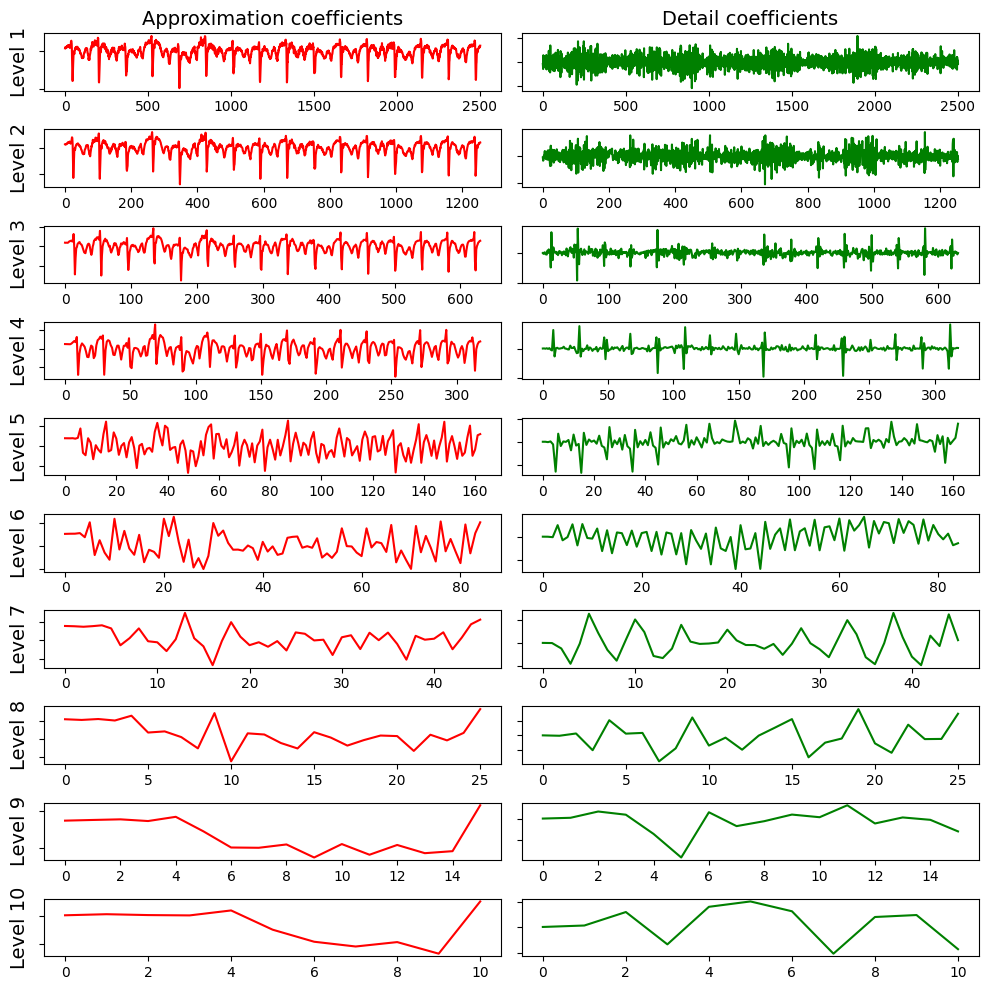

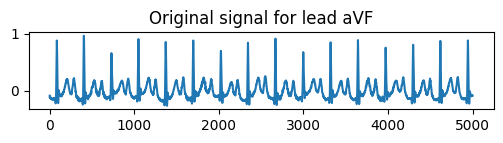

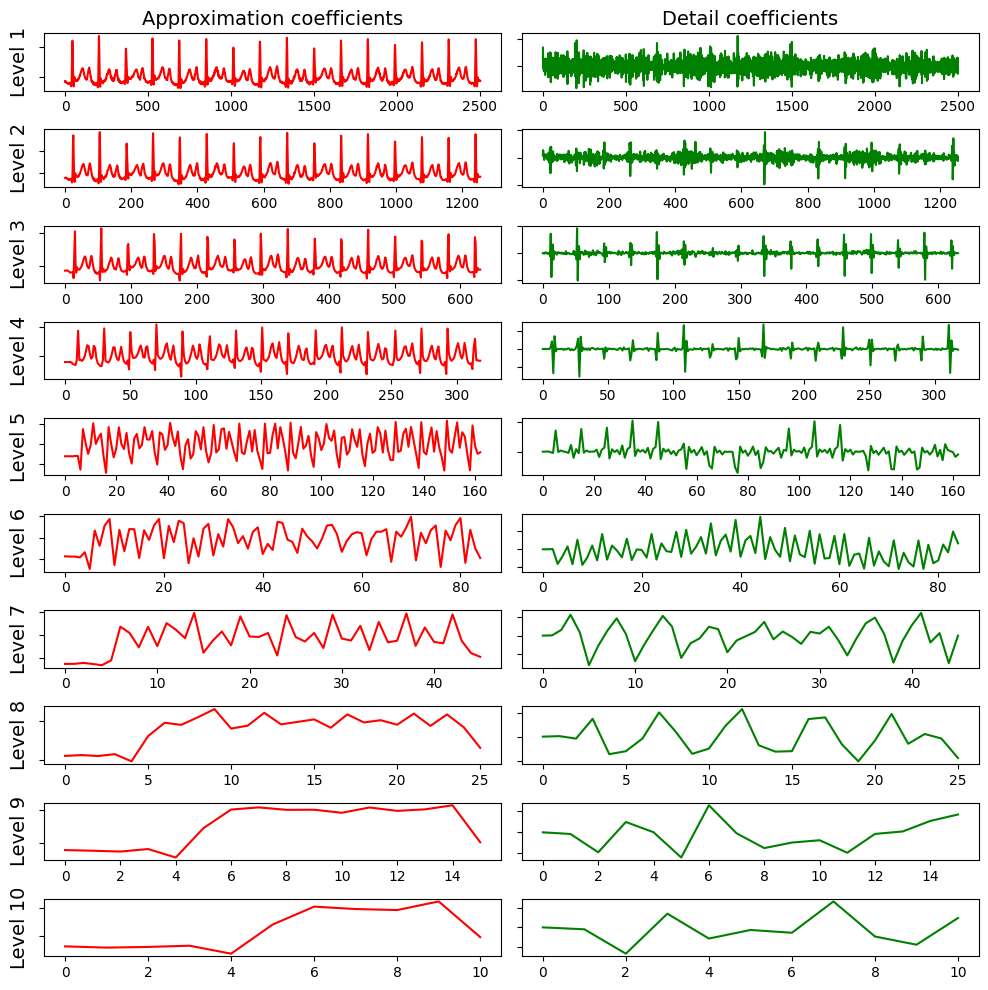

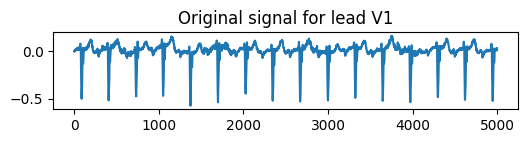

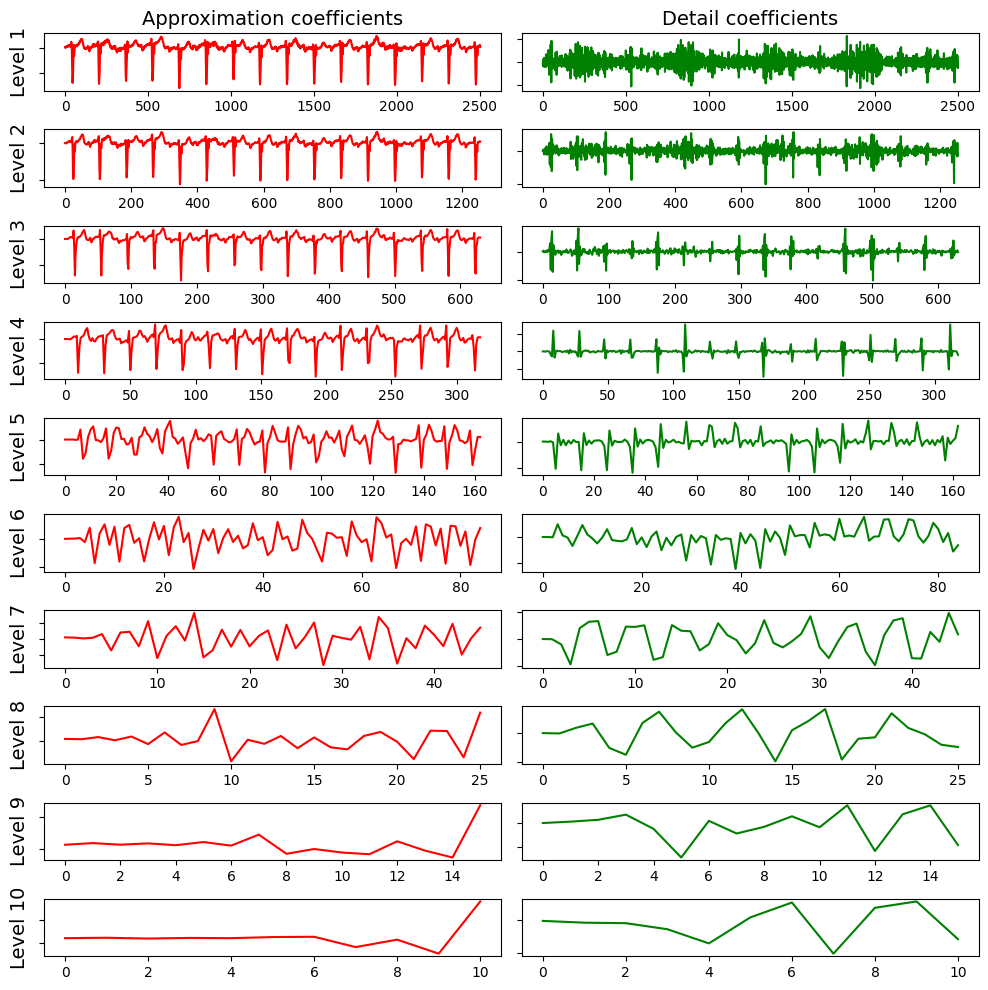

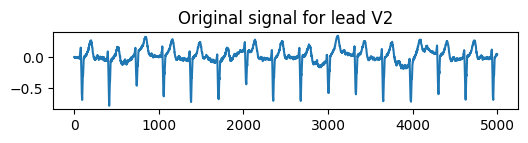

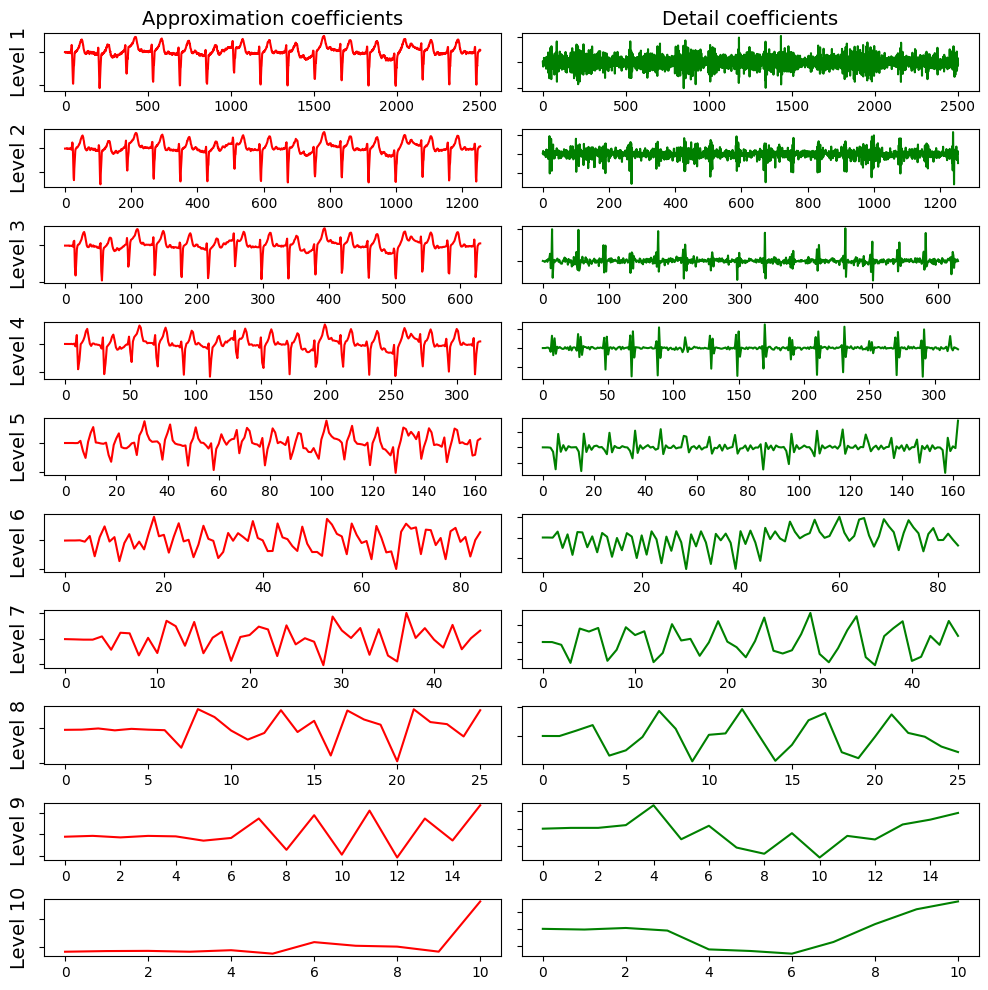

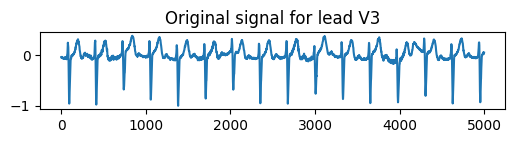

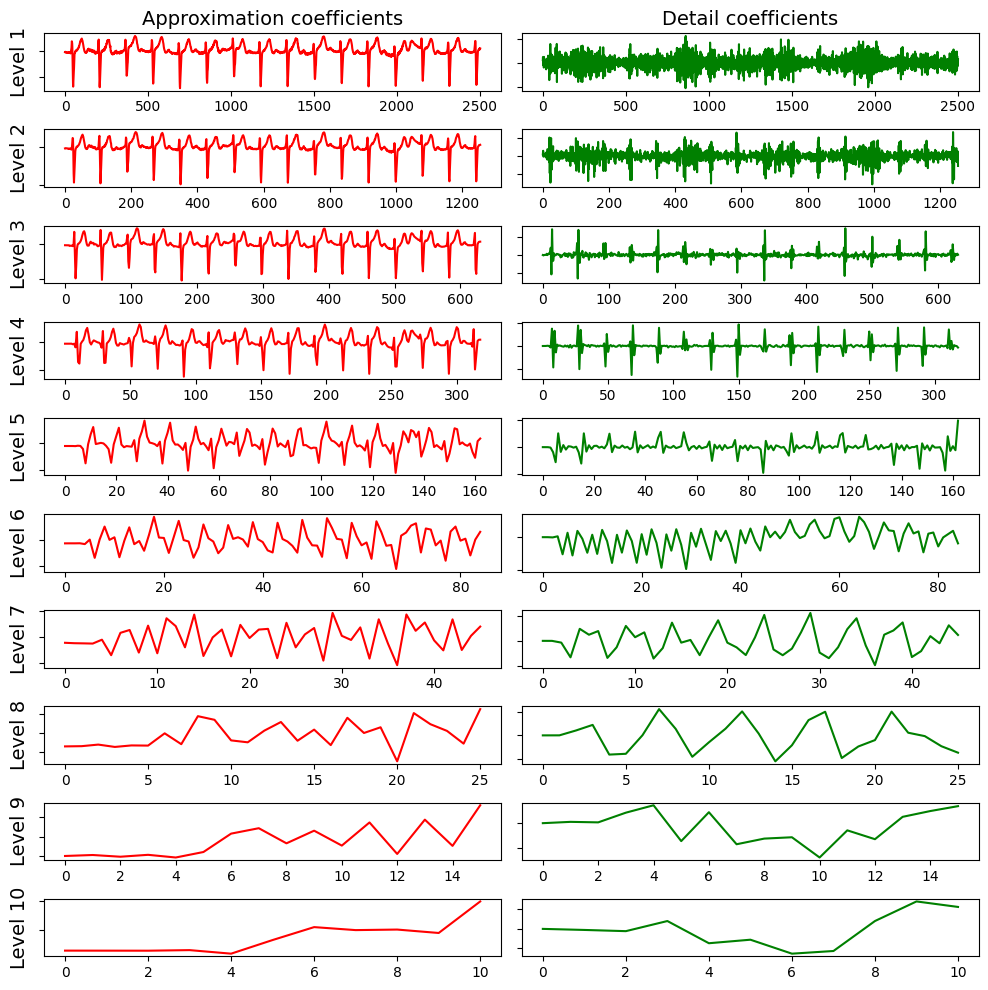

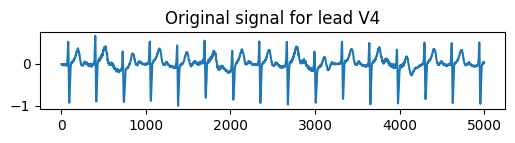

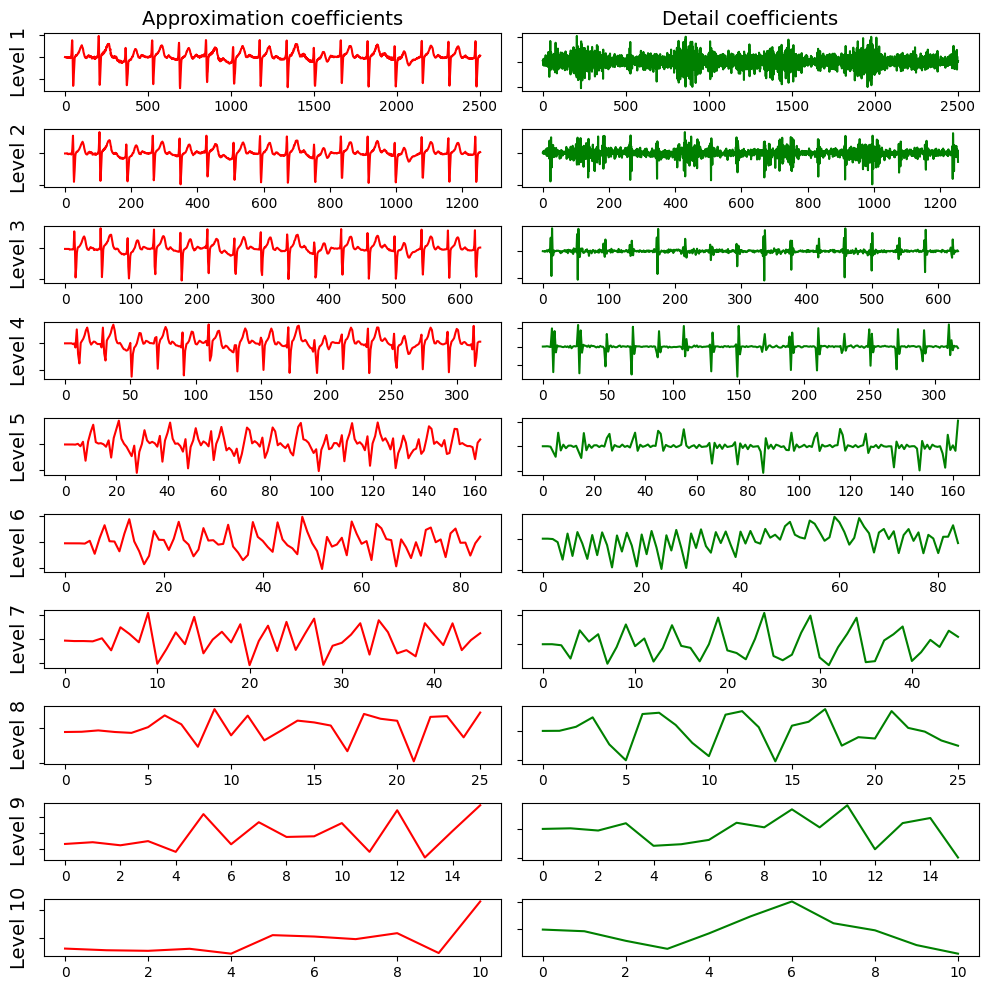

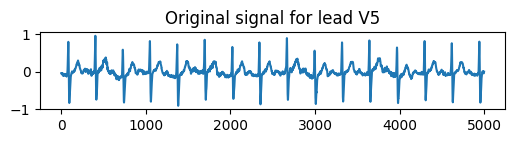

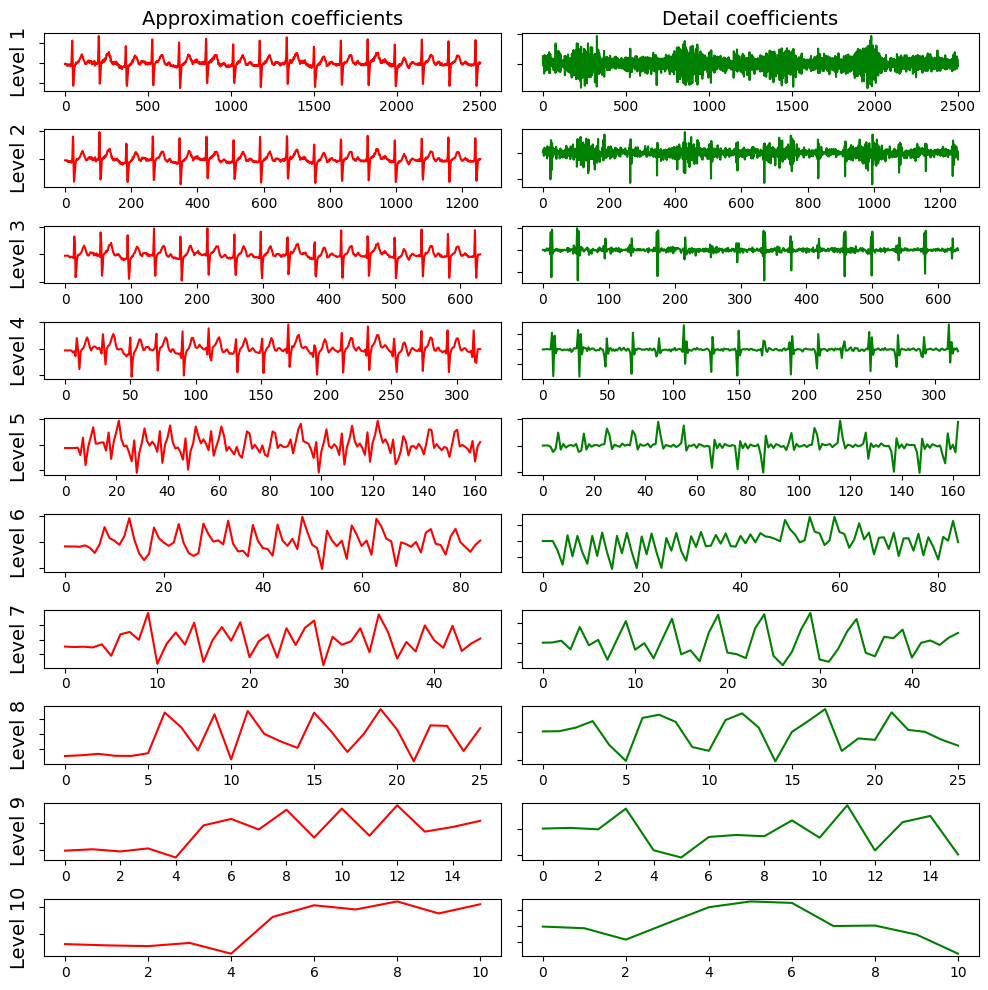

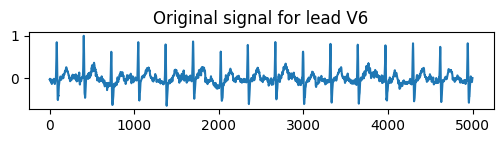

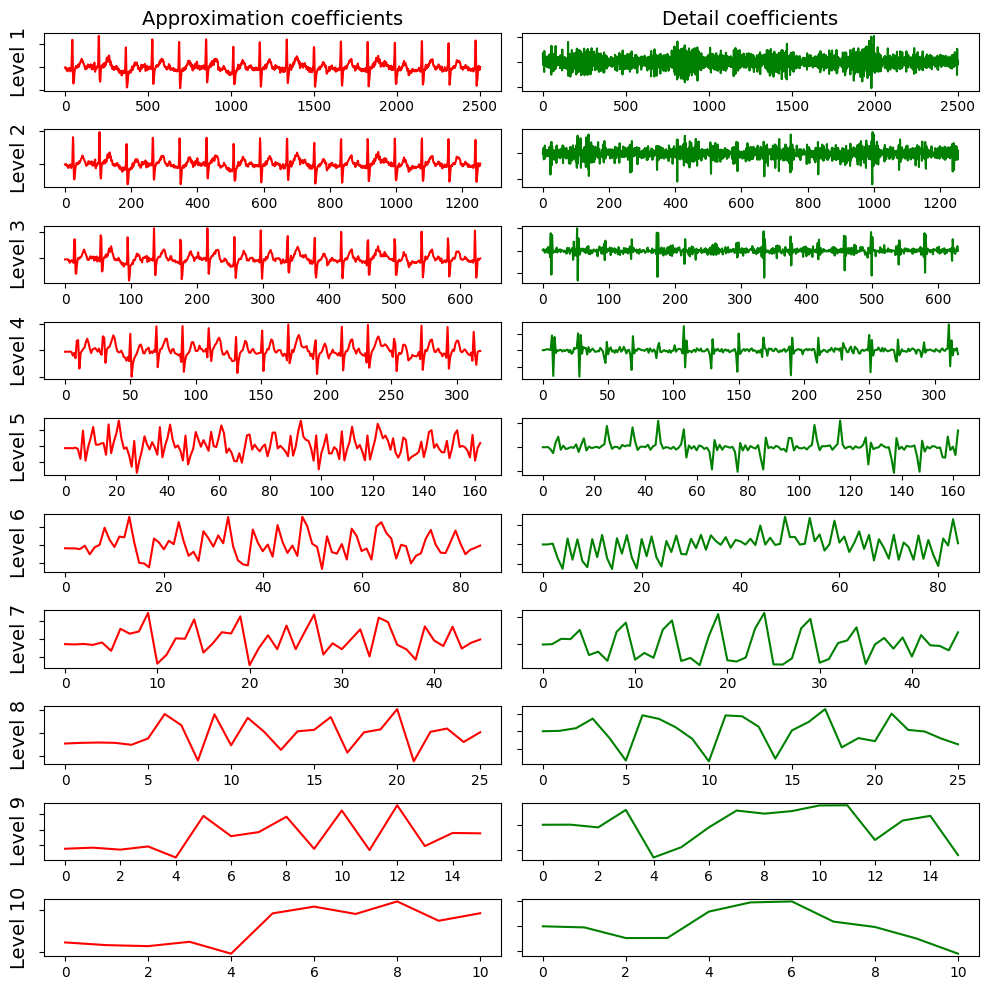

In [67]:
##Wavelet decomposition

for i in ECG_lead:
    fig, ax = plt.subplots(figsize=(6,1))
    ax.set_title(f"Original signal for lead {i.decode('utf8')}")
    ax.plot(dico_ECG[i])
    plt.show() 
    data = dico_ECG[i]
    waveletname = 'db4'
 
    fig, axarr = plt.subplots(nrows=10, ncols=2, figsize=(10,10))
    for ii in range(10):
        (data, coeff_d) = pywt.dwt(data, waveletname)
        axarr[ii, 0].plot(data, 'r')
        axarr[ii, 1].plot(coeff_d, 'g')
        axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
        axarr[ii, 0].set_yticklabels([])
        if ii == 0:
            axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
            axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
        axarr[ii, 1].set_yticklabels([])
    plt.tight_layout()
    plt.show()  


In [71]:
### Try with another python method:
waveletname = 'sym4'
level_w = 9
i = ECG_lead[1]

def Wavelet_coef(sig,name,lev):
    All_coeff = pywt.wavedec(sig,name,level = lev)

    CA_w = All_coeff[0]
    CD_w = All_coeff[1:len(All_coeff)]
    #fig, ax = plt.subplots(figsize=(6,1))
    #ax.set_title(f"approximation signal at level {lev} for lead {i.decode('utf8')}")
    #ax.plot(CA_w)
    #plt.show()

    #fig, axarr = plt.subplots(nrows=lev, ncols=1, figsize=(lev,lev))
    #for j in range(len(CD_w)):
        #axarr[j].plot(np.asarray(CD_w)[-(j+1)])
        #axarr[j].set_ylabel("Level {}".format(j + 1), fontsize=14, rotation=90)
        #axarr[j].set_yticklabels([])
        #if j ==0:
            #axarr[j].set_title("detail coefficients", fontsize=14)
    
    #plt.tight_layout()
    #plt.show()
    return CA_w,CD_w  


/tmp/ipykernel_370/1553985647.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p = np.append(p,Energy_L2(np.asarray(CD_w)[-(CD+1)])/Etot)


SQI_QRS : 0.5007975026965141


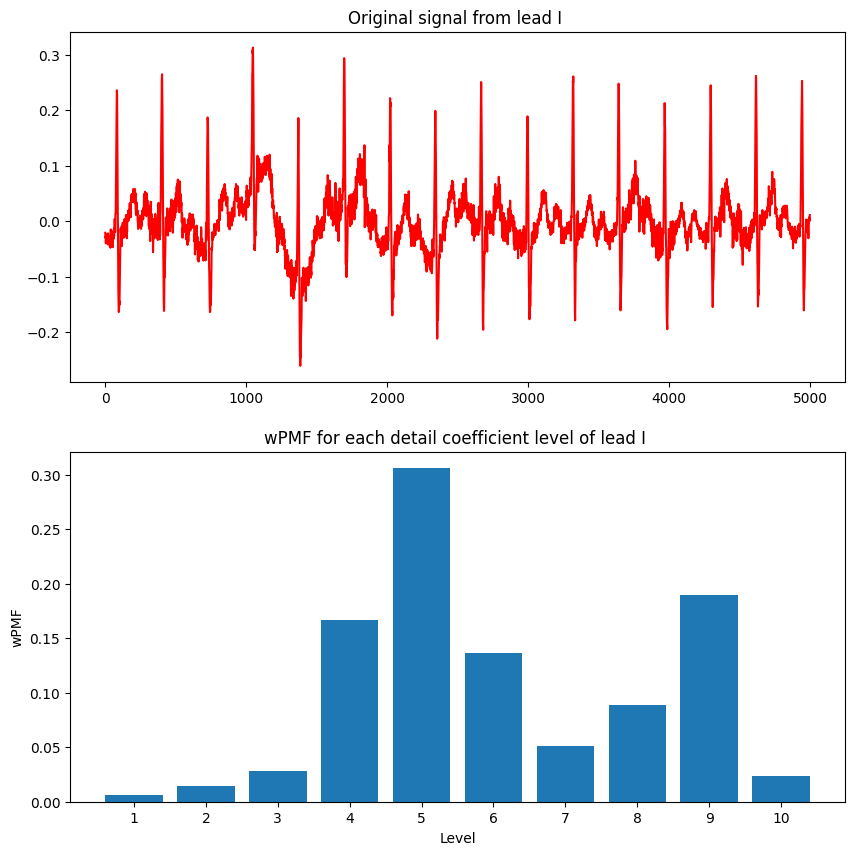

SQI_QRS : 0.5446141716092825


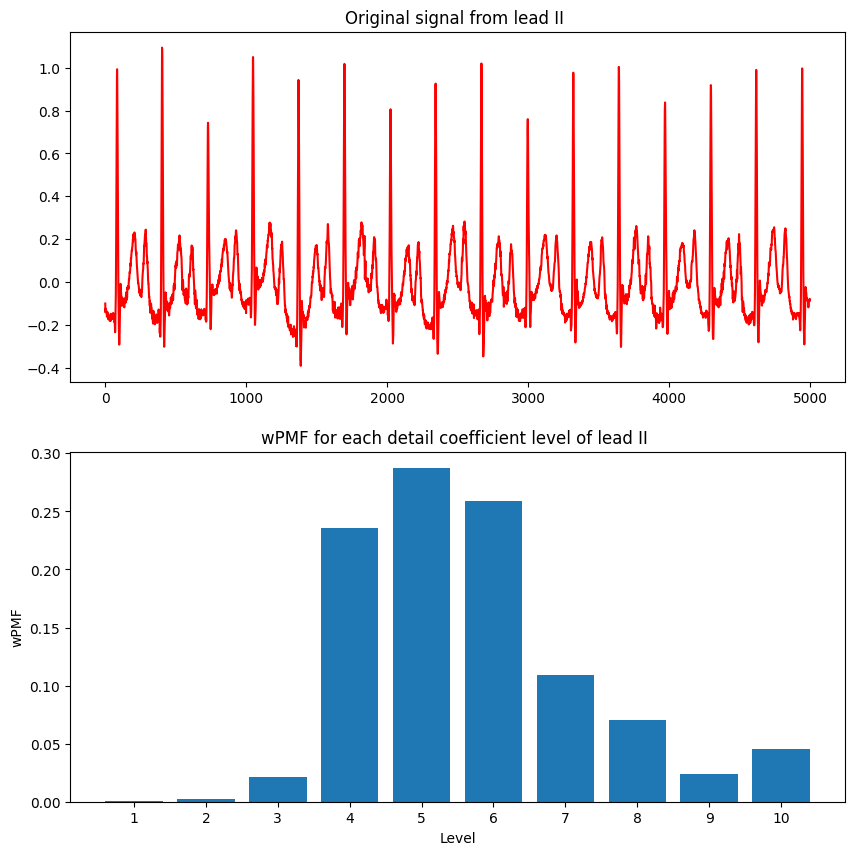

SQI_QRS : 0.505840502679348


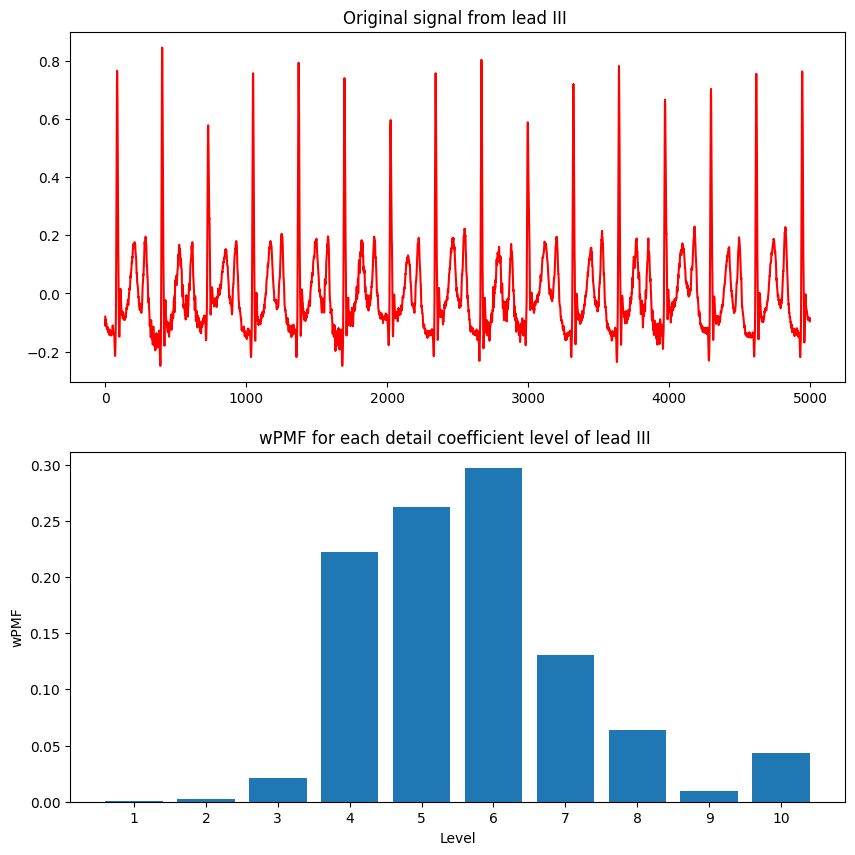

SQI_QRS : 0.5544769708067179


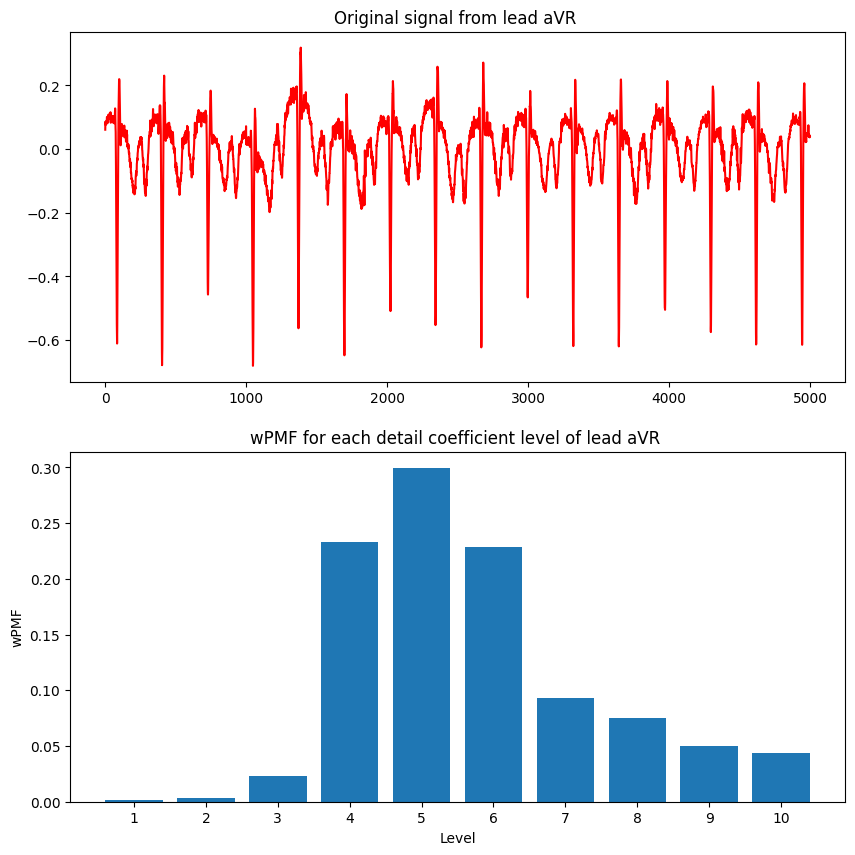

SQI_QRS : 0.4155693594366312


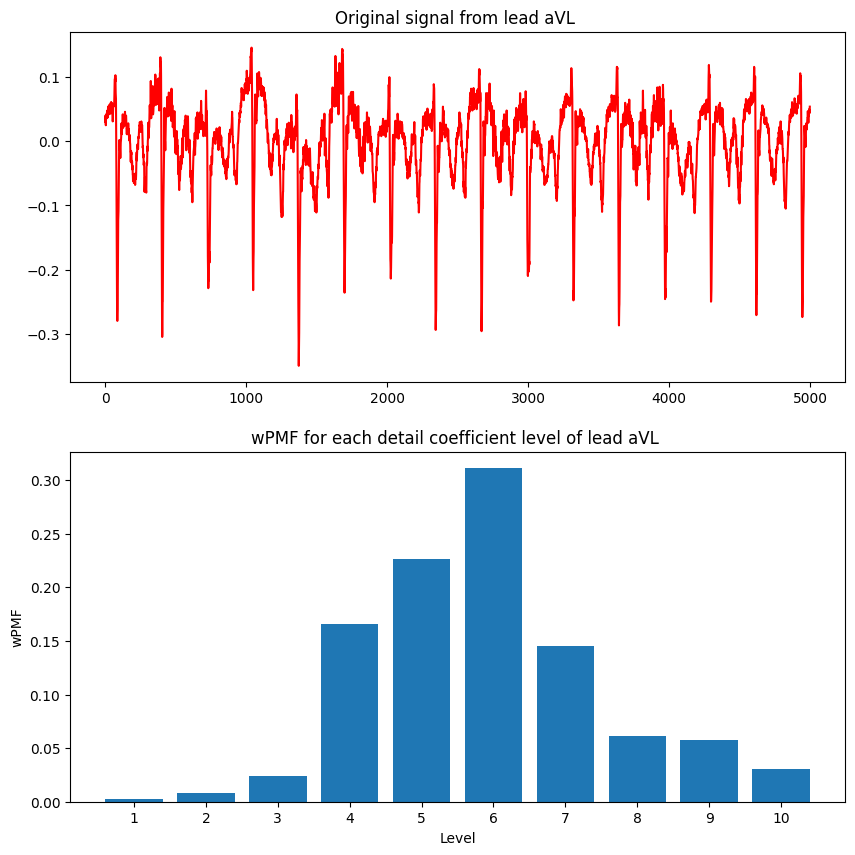

SQI_QRS : 0.530580485239625


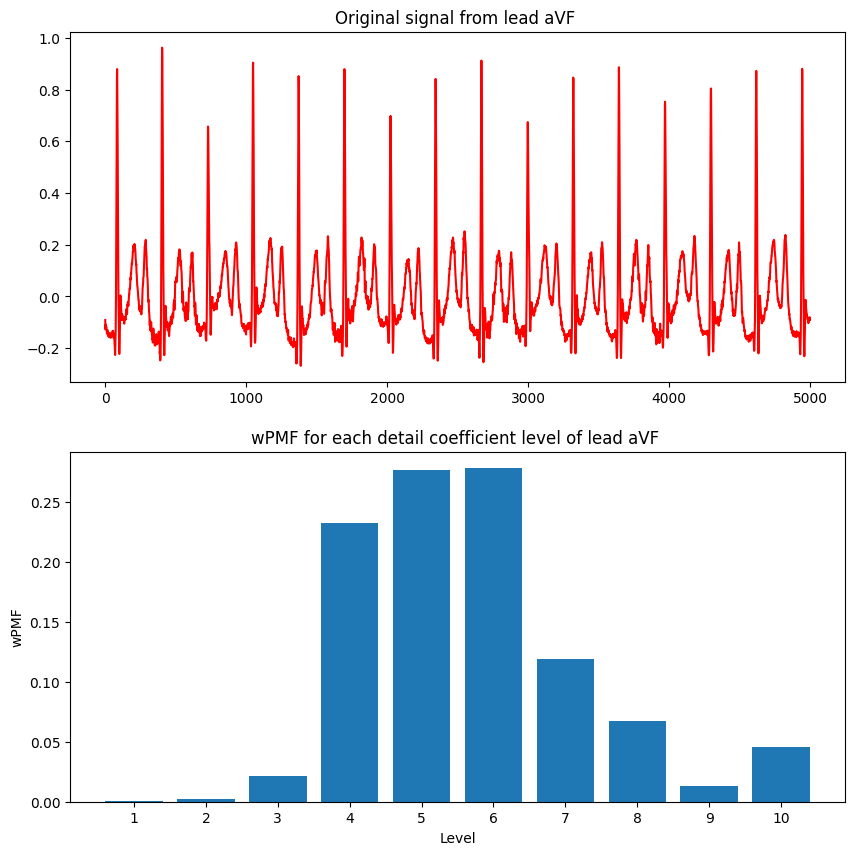

SQI_QRS : 0.4564127214252949


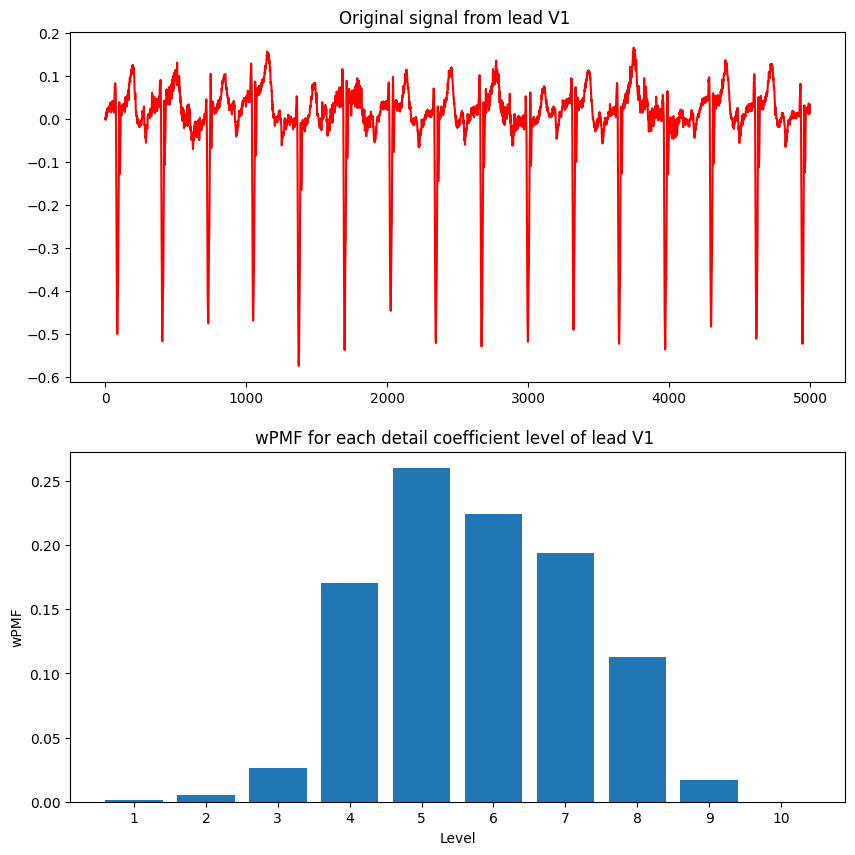

SQI_QRS : 0.2618891093879938


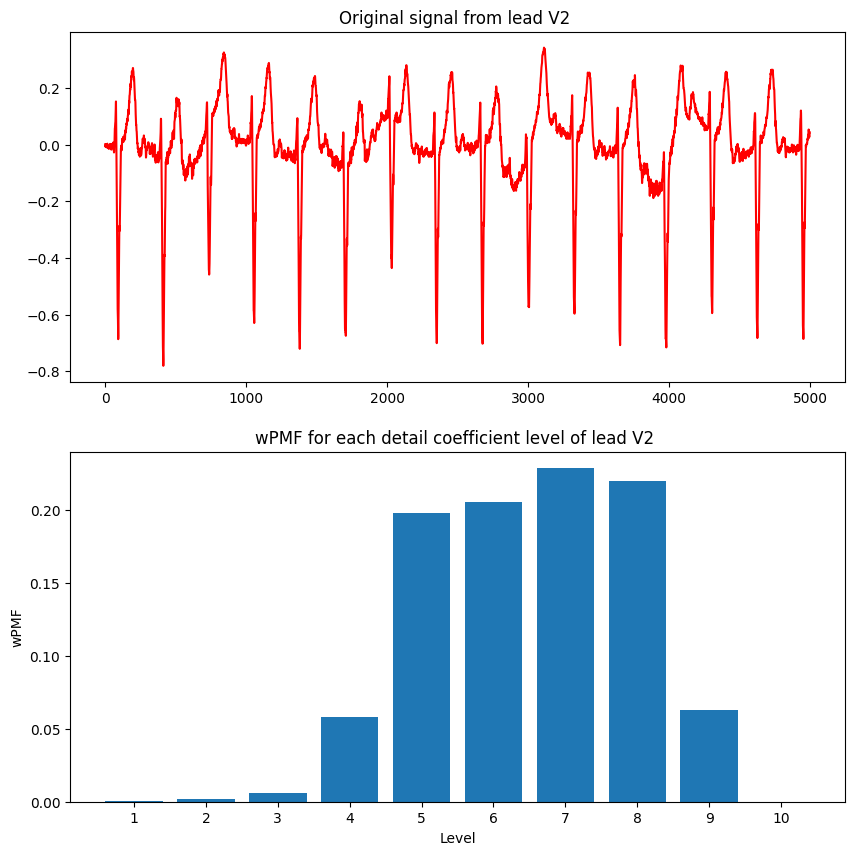

SQI_QRS : 0.35448828618973494


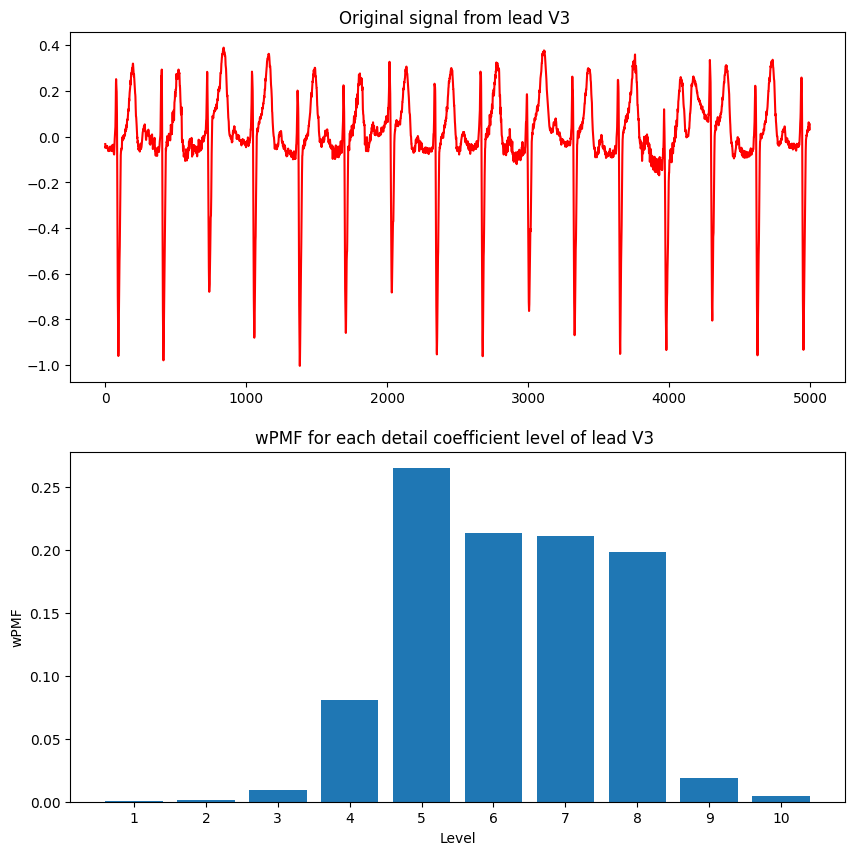

SQI_QRS : 0.43321317806839943


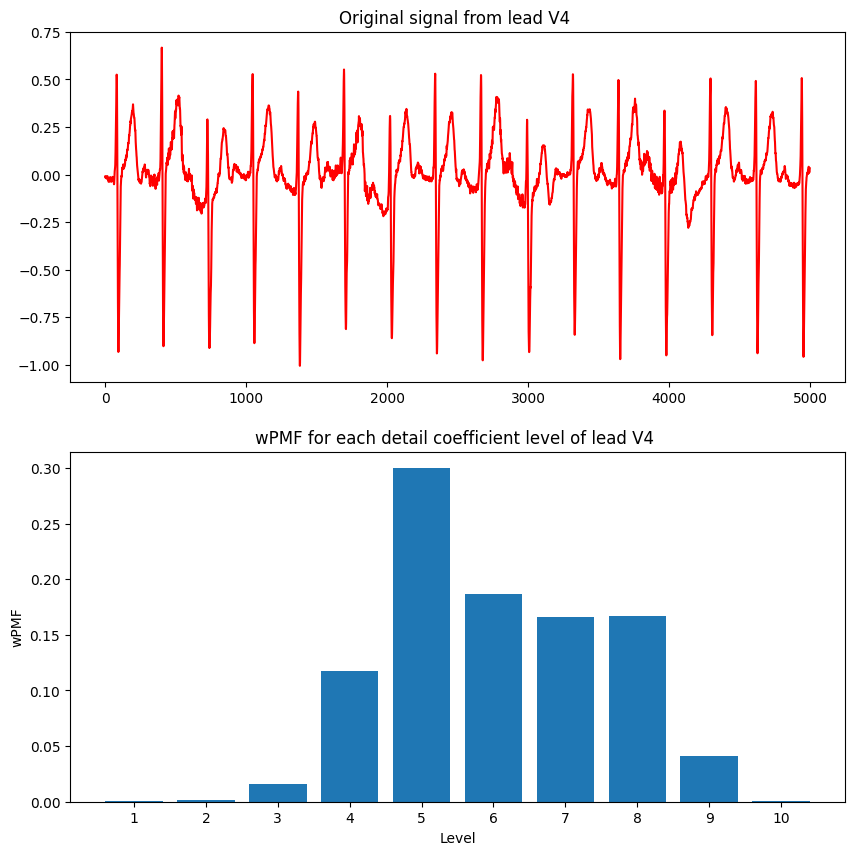

SQI_QRS : 0.5824706517159939


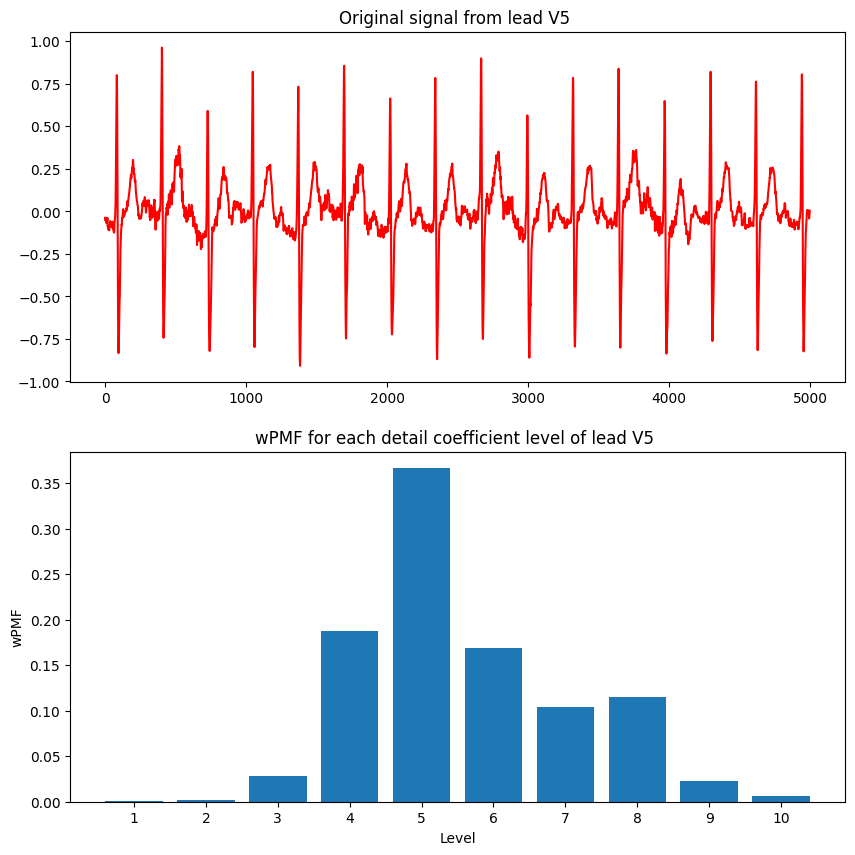

SQI_QRS : 0.6140485219657421


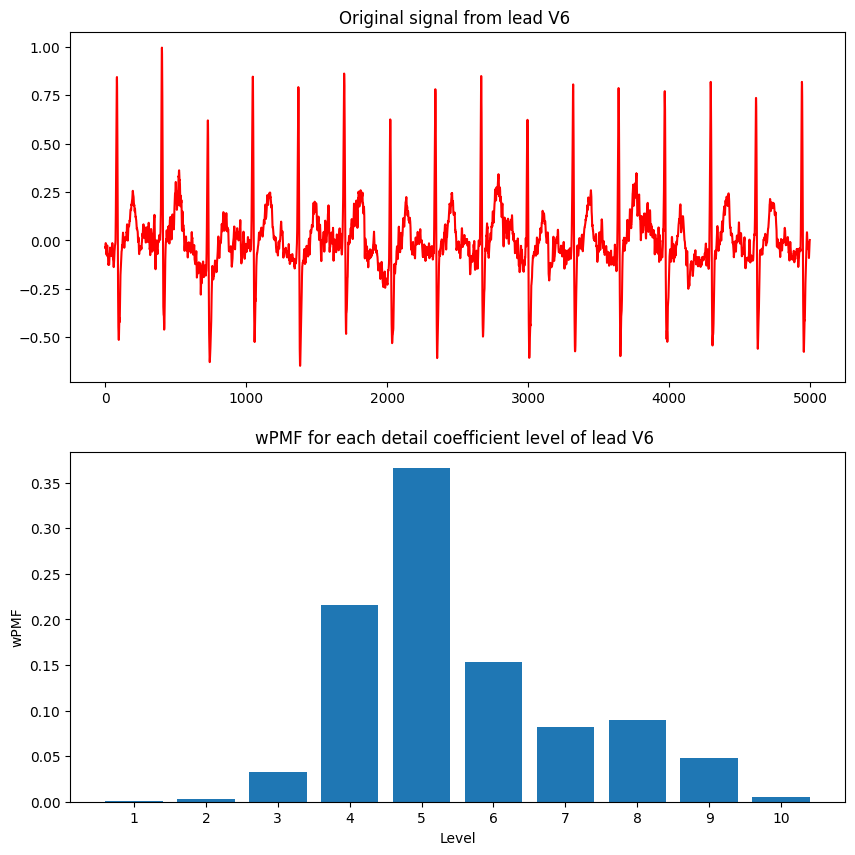

In [72]:
##Calcuation of the wPMF (wavelet probability  mass function):

def Energy_L2(coeff):
    return np.sum(np.abs(coeff)**2)

for i in ECG_lead:
    CA_w,CD_w = Wavelet_coef(dico_ECG[i],waveletname,level_w)
    Etot = Energy_L2(dico_ECG[i])
    p = np.array([])
    for CD in range(level_w):
        p = np.append(p,Energy_L2(np.asarray(CD_w)[-(CD+1)])/Etot)
    p = np.append(p,Energy_L2(np.asarray(CA_w)[0])/Etot)
    SQI_QRS = np.sum(p[2:5])
    print("SQI_QRS :",SQI_QRS)
    fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
    ax[0].set_title(f"Original signal from lead {i.decode('utf8')} ")
    ax[0].plot(dico_ECG[i],'r')
    ax[1].set_title(f"wPMF for each detail coefficient level of lead {i.decode('utf8')} ")
    ax[1].bar(range(1,level_w+2),p)
    plt.xticks(range(1,level_w+2),range(1,level_w+2))
    ax[1].set_xlabel("Level")
    ax[1].set_ylabel("wPMF")
    plt.show()

    
    


In [78]:
##MSSR method
def conv_m(a, b, mode='full'):
    """Convolve a vector with collection of vectors.
    Convolve a 1D array `a` with each column of the 2D array `b`.   
    
    Convolution is carried out with `scipy.signal.fftconvolve`
    
    Parameters
    ----------
    a : 1D array
        1D array input
        
    b : 1D or 2D array_like
        1D or 2D array input
        
    mode : str {'full', 'same'}, optional
        A string indicating the size of the output:
        ``full``
           The output is the full discrete linear convolution
           of the inputs. (Default)
        ``same``
           The output is the same size as `a`, centered
           with respect to the 'full' output.
    Returns
    -------
    c : 2D array
        A 2D array where each columns corresponds to the 
        convolution of `a` and a column of `b`
    
    See Also
    --------
    `scipy.signal.fftconvolve()`
        
    """
    # input vector 'a' to 1 dimension
    a = a.ravel()
    # number of samples vector 'a'
    siz_a = len(a)
    
    # input 'b' as 2D matrix [samples, columns]
    try:
        b.shape[1]
    except IndexError:
        b = b[:, np.newaxis]
    
    # number of samples and number of channels in input 'b'
    siz_b, col_b = b.shape
    
    # allocate space for result
    if mode == 'same':
        c = np.zeros((siz_a, col_b) , dtype = complex)
    elif mode == 'full':
        N = siz_a + siz_b - 1
        c = np.zeros((N , col_b), dtype = complex)
    
    # 1D convolutions per columns in 'b'    
    for ix in range(0 , col_b):
         c[:,ix] = scipy.signal.fftconvolve(a, b[:,ix] , mode)
         
    return c


def epoching(data, samples_epoch, samples_overlap = 0):
    """Divide an array in a colletion of smaller arrays
    
    Divides the `data` provided as [n_samples, n_channels] using the 
    `size_epoch` indicated (in samples) and the `overlap_epoch` between 
    consecutive epochs.
   
    Parameters
    ----------
    data : 2D array 
        with shape (n_samples, n_channels)
    samples_epochs : 
        number of samples in smaller epochs
        
    samples_overlap : 
        number of samples for ovelap between epochs (Default 0)
    Returns
    -------
    epochs : 3D array 
        with shape (samples_epoch, n_channels, n_epochs)
    
    remainder : 2D array 
        with the remaining data after last complete epoch
    
    ix_center : 1D array
        indicates the index tha corresponds to the center of the nth epoch.
    """ 
    # input 'data' as 2D matrix [samples, columns]
    try:
        data.shape[1]
    except IndexError:
        data = data[:, np.newaxis]
    
    # number of samples and number of channels
    n_samples, n_channels = data.shape

    # Size of half epoch
    half_epoch = np.ceil(samples_epoch / 2 )

    # Epoch shift   
    samples_shift = samples_epoch - samples_overlap

    # Number of epochs
    n_epochs =  int(np.floor( (n_samples - samples_epoch) / float(samples_shift) ) + 1 )
    if n_epochs == 0:
        return np.array([]), data, np.array([])

    #markers indicates where the epoch starts, and the epoch contains samples_epoch rows
    markers = np.asarray(range(0,n_epochs)) * samples_shift
    markers = markers.astype(int)

    #Divide data in epochs
    epochs = np.zeros((samples_epoch, n_channels, n_epochs))
    ix_center = np.zeros((n_epochs,1))

    for i_epoch in range(0,n_epochs):
        epochs[:,:,i_epoch] = data[ markers[i_epoch] : markers[i_epoch] + samples_epoch ,:]
        ix_center[i_epoch] = markers[i_epoch] -1 + half_epoch
        
    if ( (markers[-1] + samples_epoch) < n_samples): 
        remainder = data[markers[-1] + samples_epoch : n_samples, :]
    else:
        remainder = np.asarray([])
    
    return epochs, remainder, ix_center.astype(int)

def iepoching(epochs, shift_epoch):
    """
    Merges a set of epochs [n_samples_epoch, n_channels] into  
    the complete signal(s) x [n_samples, n_channels] taking into account
    the shift between consecutive epochs
   
    Parameters
    ----------
    epochs : 2D array_like with shape (n_samples, n_channels)
    shift_epoch : number of samples in smaller epochs
    Returns
    -------
    x : 2D array with shape (samples_epoch, n_channels, n_epochs)
    """
    
    # obtain parameters
    (size_epoch, n_channels, n_epochs) = epochs.shape
    n_samples = (shift_epoch * (n_epochs - 1)) + size_epoch
    ix = np.arange(n_epochs) * shift_epoch
    
    # merging matrix
    merging = np.zeros((n_samples, n_channels, 2))
    # Number of epochs that contribute for a specific point
    n_merging = np.zeros((n_samples, n_channels, 2))
    
    for i_epoch in range(n_epochs):
        merging[ix[i_epoch] : ix[i_epoch] + size_epoch, :, 1 ] = epochs[:, :, i_epoch]
        n_merging[ix[i_epoch] : ix[i_epoch] + size_epoch, :, 1] = 1
        merging[:,:,0] = np.sum(merging, axis=2)
        n_merging[:,:,0] = np.sum(n_merging, axis=2)
        merging[ix[i_epoch] : ix[i_epoch] + size_epoch, :, 1 ] = 0
        n_merging[ix[i_epoch] : ix[i_epoch] + size_epoch, :, 1 ] = 0
    
    x = np.divide(merging[:,:,0], n_merging[:,:,0])    
    return x 


def cmorlet_wavelet(x, fs, freq_vct, n=6, normalization=True):
    """Perform the continuous wavelet (CWT) tranform using the complex Morlet wavelet.
    
    Parameters
    ----------
    x  : 1D array with shape (n_samples) or 
         2D array with shape (n_samples, n_channels)
    fs : Sampling frequency 
        in Hz
    freq_vct : 1D array 
        with frequencies to compute the CWT (Default = [1 : 1 : fs/2] )
    n : Number of cicles inside the Gaussian curve 
        (Default 6)
    normalization : Scale each wavelet to have energy equal to 1
        (Default True) 
    Returns
    -------
    wcoef : Complex wavelet coefficients 
            2D array with shape [n_samples, n_freqs] if `x` is 1D array
            3D array with shape [n_samples, n_freqs, n_channels] if `x` is 2D array
    
    wfam  : 2D array with shape [n_wavelet_samples, n_freqs] where each column
            corresponds to the a member of the wavelet family
    
    """
    # input 'x' as 2D matrix [samples, columns]
    try:
        x.shape[1]
    except IndexError:
        x = x[:, np.newaxis]
    
    # number of samples and number of channels
    n_samples, n_channels = x.shape
    
    # number of wavelets
    n_freqs = len(freq_vct)

    # number of samples for Wavetet family
    # This is equal to the number of samples needed to represent 2*n cycles 
    # of a sine with frequency = fres(1)[Hz], sampled at fs [Hz]. 
    # This is done to ensure that every wavelet in the wavalet family will be 
    # close to 0 in the negative and positive edges
    n_samples_wav = np.round( (2*n/freq_vct[0])*fs )

    # The wavelet will be symmetrical around 0
    if np.mod(n_samples_wav,2) == 0: # even samples
        n_samples_wav = n_samples_wav + 1

    # create time vector for Wavelet family
    half = np.floor(n_samples_wav/2)
    time = np.arange(-half, half+1)/fs

    # initialize Wavelet family matrix
    wfam = np.zeros([len(time), n_freqs], dtype=complex)

    # for each frequency defined in FREQ, create its respective Wavelet
    for iwav in range(n_freqs):
        s = n/(2*np.pi*freq_vct[iwav])
        gaussian_win = np.exp((-time**2)/(2*s**2))
        sinwave = np.exp(2*np.pi*1j*freq_vct[iwav]*time)
        if normalization:
            # each wavelet has unit energy sum(abs(wavelet).^2)) = 1
            A = 1. / ((s**2) * np.pi) ** (1./4)
        else:
            A = 1.
        # Complex Morlet wavelet
        wfam[:, iwav] = A * sinwave * gaussian_win

    wcoef = np.zeros((n_samples, n_freqs, n_channels), dtype=complex)

    if n_channels == 1:
        # one channel
        tmp = conv_m(x, wfam, 'same')
        wcoef[:, :, 0] = tmp        
    else:
        # convolution between signal X and the each Wavelt in the Wavelet family
        for i_channel in range(n_channels):
            x_tmp = x[:, i_channel]
            tmp = conv_m(x_tmp, wfam, 'same')
            wcoef[:, :, i_channel] = tmp     

    return wcoef, wfam


def rfft(x, n=None, dim=None):
    """Real Fast Fourier Transform.
    
    Considering a real signal A with B = fft(A), B is Hermitian symmetric,
    i.e. B(-1) = conj(B(1)), therefore the complete spectrum B
    can be found by using with only the non-negative frequencies in B
    
    
    Parameters
    ----------
    x : 1D array with shape (n_samples) or
        2D array with shape (n_samples, n_channels)
    
    n : Number of samples to compute the FFT
        (Default = n_samples in array x)    
    dim : Dimension to compute the RFFT 
        (Default:  first array dimension whose size does not equal 1)
    Returns
    -------
    y  : Non-negative complex spectrum of `x` with shape as `x`
    
    See Also
    --------
    `np.fft.fft()`
    
    """

    # shape of x
    shape_x = x.shape
    # number of dimentions
    dim_x = len(shape_x)
    
    # limits to 2-dimention data
    assert dim_x<=2
    
    # check shape of X, and set n and dim defaults
    if dim_x == 1:
        dim_def = 0
    else:
        if shape_x[0] == 1:
            # shape [1, n_samples] (row vector)
            dim_def = 1
        elif shape_x[1] == 1:
            # shape [n_samples, 1] (column vector)
            dim_def = 0 
        else:
            # X is a 2D Matrix, a shape [n_samples, n_channels] is asummed
            dim_def = 0
    
    if dim is None:
        dim = dim_def
    
    if n is None:
        n = shape_x[dim]
    
    # FFT
    yc = np.fft.fft(x, n=n, axis=dim)
    
    # points to keep
    if n%2 == 0:    
        # even case
        n_new = int((n / 2) + 1)
    else:
        # odd case
        n_new = int((n + 1) / 2)
    
    if dim_x == 1:
        y = yc[0:n_new]
    else:
        if dim == 0:
            y = yc[0:n_new,:]        
        else:
            y = yc[:, 0:n_new]
    
    return y

def irfft(y, n=None, dim=None):
    '''
    The IRFFT function returns the Inverse DFT (using the RFFT algorithm)of
    a spectrum Y containing ONLY the positive frequencies, with the
    assumption than Y is the positive half of a Hermitian Symmetric spectrum
    from a real signal X.
        
    Parameters
    ----------
    y : 1D or 2D array with the positive spectrum of 
        real-valued signals with shape (n_samples, n_channels)
    n : Number of samples in the original x signals 
        N not provided. Y is assumed be obtained from a signal X with even number fo samples 
    dim : Dimension to compute the IRFFT (Default: first array dimension whose size does not equal 1)
    Returns
    -------
    x : Real-valued signal(s) 
        
    See Also
    --------
    `np.fft.ifft()`
    '''
    
    # verify y
    shape_y = y.shape
    # number of dimentions
    dim_y = len(shape_y)
    
    # limits to 2-dimention data
    assert dim_y<=2
        
    # check shape of y, and set n and dim defaults
    if dim_y == 1:
        dim_def = 0
    else:
        if shape_y[0] == 1:
            # shape [1, n_samples] (row vector)
            dim_def = 1
        elif shape_y[1] == 1:
            # shape [n_samples, 1] (column vector)
            dim_def = 0 
        else:
            # X is a 2D Matrix, a shape [n_samples, n_channels] is asummed
            dim_def = 0
     
    if dim is None:
        dim = dim_def
            
    # verify 'n' number-of-samples parameter
    if n is None:
        print('N not provided. Y is assumed be obtained from a signal X with even number fo samples')
        n_half = shape_y[dim]
        n = (n_half - 1) * 2
    
    # reconstruct missing half of Spectrum
    if np.mod(n,2) == 0:
        # number of samples is even
        n_half = (n / 2) + 1
        ix_limit = slice(1, -1 )
    else:
        # number of samples is odd
        n_half = (n + 1) / 2
        ix_limit = slice(1, None)

    if dim_y == 1:
        # spectrum in y is 1D
        y_neg = np.conj(np.flipud(y[ix_limit]))
        yc = np.concatenate((y, y_neg), axis=0)
    else:
        # check shape of y, and add negative frequencies
        if dim == 0:
            # spectra in y are column wise
            y_neg = np.conj(np.flipud(y[ix_limit, :]))
            yc = np.concatenate((y, y_neg), axis=0)
        else:
            # spectra in y are row-wise
            y_neg = np.conj(np.fliplr(y[:, ix_limit]))
            yc = np.concatenate((y, y_neg), axis=1)
        
    x = np.real(np.fft.ifft(yc, n, dim))
        
    return x


def rfft_psd(x, fs, n_fft=None, win_function = 'hamming', channel_names=None):
    """ This function computes the PSD for one or a set of REAL signals.
        
    Parameters
    ----------
    x  : 1D array with shape (n_samples) or
         2D array with shape (n_samples, n_channels)
    fs : Sampling frequency 
        in Hz
    n_fft : Number of samples to compute the FFT
            (Default = n_samples in array x)   
    win_function : Window function applied to the signal 
        (Default 'Hamming')
    channel_names : Names of the signals
        (Default Signal-XX with XX 1, 2, ... n_channels) 
    Returns
    -------
    psd_data : Dictionary with PSD data, with the elements:
       rFFT
           First half of the FFT(x) (u), scaled by the Window RMS       
       PSD
           Power Spectrum Density (u^2 / Hz) 
       fs
           Sampling frequency (Hz)
       freq_axis
           Frequency axis for rFFT and PSD (Hz)
       freq_delta
           Frequency axis step (Hz)
       n_samples
           Number of samples of the signal or signals 'x'
       n_fft
           Number of elements utilized to perform FFT
       win_function
           Window applied to the data in 'x'
       channel_names 
           Names of channels
    
    """

    # input 'x' as 2D matrix [samples, columns]
    try:
        x.shape[1]
    except IndexError:
        x = x[:, np.newaxis]
    
    # number of samples and number of channels
    n_samples, n_channels = x.shape
    
    # validate 'n_fft' argument
    if n_fft is None:
        n_fft = n_samples

    # generate default channel names, if needed
    if channel_names is None:
        channel_names = []
        for ic  in range (0 , n_channels):
            icp = ic + 1
            channel_names.append( str('Signal-%02d' % icp) )
            
    # windowing data
    win = scipy.signal.get_window(win_function, n_samples, fftbins=False)
    win.shape = (n_samples, 1)
    win_rms = np.sqrt(np.sum(np.square(win)) / n_samples)
    win_mat = np.tile(win, n_channels)
    x = np.multiply(x, win_mat)

    # real FFT with zero padding if n_fft ~= n_samples
    Xt = rfft(x, n_fft)
    # spectrum scaled by window RMS
    Xt = Xt / win_rms
    # power spectrum
    X_pwr = abs(np.multiply(Xt, np.conj(Xt)))
    X_pwr = X_pwr * (1/np.square(n_fft))

    # adjust for even and odd number of elements
    if n_fft % 2 != 0:
       # odd case
        n_freqs = (n_fft + 1) / 2
       # double all frequency components except DC component 
        X_pwr[1:, :] = X_pwr[1:, :] * 2
    
    else:
       # even case 
        n_freqs = (n_fft / 2) + 1
       # double all frequency components except DC and fs/2 components
        X_pwr[1:-1, :] = X_pwr[1:-1, :] * 2
    
    # frequency axis step
    f_delta = (fs / n_fft)
    # scale PSD with the frequency step
    psd = np.divide(X_pwr, f_delta)

    # frequency axis for spectrum
    n_freqs = int(n_freqs)
    f_axis = np.asarray(range(0, n_freqs)) * f_delta
    
    # output 'psd_data' dictionary
    psd_data = {}
    psd_data['rFFT'] = Xt
    psd_data['PSD'] = psd
    psd_data['fs'] = fs
    psd_data['freq_axis'] = f_axis
    psd_data['freq_delta'] = f_delta
    psd_data['n_samples'] = n_samples
    psd_data['n_fft'] = n_fft
    psd_data['win_function'] = win_function
    psd_data['channel_names'] = channel_names
    
    return psd_data

def irfft_psd(psd_data):
    """Compute the inverse PSD for one or a set of REAL signals.
         
     Parameters
     ----------
     psd_data : Structure with PSD data, created with rfft_psd()
 
     Returns
     -------
     x  : 1D array with shape (n_samples) or
          2D array with shape (n_samples, n_channels)
    """
    # Load data from PSD structure
    rFFT_data = psd_data['rFFT']
    f_ax = psd_data['freq_axis']
    fs = psd_data['fs']
    win_function = psd_data['win_function']
    n_samples = psd_data['n_samples']
    n_channels = rFFT_data.shape[1]
    
    # Find the number of elements used for the rFFT
    if f_ax[-1] < fs/2:
        # elements for FFT was odd
        n_fft = (len(f_ax) * 2) - 1
    elif f_ax[-1] - fs/2 < 1000 * np.finfo(np.float64).eps:
        # elements for FFT was even
        n_fft = (len(f_ax) - 1) * 2
    
    # Window RMS
    win = scipy.signal.get_window(win_function, n_samples, fftbins=False)
    win.shape = (n_samples, 1)
    win_rms = np.sqrt(np.sum(np.square(win)) / n_samples)
        
    # IRFFT
    X = rFFT_data * win_rms
    x_tmp = irfft(X, n_fft)
    
    # Keep only n_samples points
    x = x_tmp[0 : n_samples + 1, :]
    
    # Un-Windowing
    win_mat = np.tile(win, n_channels)
    x = np.divide(x, win_mat)
    
    return x

def strfft_spectrogram(x, fs, win_size, win_shift, n_fft=None, win_function='hamming', channel_names=None):
    """Compute the Short Time real FFT Spectrogram for one or a set of REAL signals 'x'.
        
    Parameters
    ----------
    x  : 1D array with shape (n_samples) or
         2D array with shape (n_samples, n_channels)
    fs : Sampling frequency 
         in Hz
    win_size :
        Size of the sliding window for STFFF (samples)
    win_shift :
        Shift between consecutive windows (samples)   
    n_fft : Number of samples to compute the FFT
            (Default = n_samples in array x)   
    win_function : Window function applied to the signal 
        (Default 'Hamming')
    channel_names : Names of the signals
        (Default Signal-XX with XX 1, 2, ... n_channels) 
    Returns
    -------
    spectrogram_data : Dictionary with Spectrogram data, with the elements:
       rFFT_spectrogram
           rFFT values for each window (u), scaled by the Window RMS       
       power_spectrogram :
           PSD values for each window (u^2 / Hz) 
       fs : 
           Sampling frequency (Hz)
       freq_axis :
           Frequency axis for rFFT and PSD (Hz)
       freq_delta :
           Frequency axis step (Hz)
       time_axis :
           Time axis for rFFT_spectrogram and power_spectrogram (s)       
       time_delta :
           Time axis step (s)
       win_size_samples :
           Size of the sliding window for STFFF (samples)
       win_shift_samples :
           Shift between consecutive windows (samples)   
       n_fft :
           Number of elements utilized to perform FFT    
       win_function :
           Window applied to the data in 'x'           
       n_windows :
           Number of ST windows
       n_samples :
           Number of samples of the signal or signals 'x'
       channel_names 
           Names of channels
    
    """
    
    # input 'x' as 2D matrix [samples, columns]
    try:
        x.shape[1]
    except IndexError:
        x = x[:, np.newaxis]
    
    # number of samples and number of channels
    n_samples, n_channels = x.shape
    
    # validate 'n_fft' argument    
    if n_fft is None:
        n_fft = win_size

    # round win_size and win_shift
    win_size = round(win_size)
    win_shift = round(win_shift)

    # time axis step for Spectrogram
    t_delta = win_shift / fs

    # Create time vector 'time_vct' for signal 'x'
    time_vct = np.array(range(0, np.size(x, 0))) / fs

    
    # epoch signal or signals 'x'
    x_epoched, _ , ix = epoching(x, win_size, win_size - win_shift)

    # time axis for Spectrogram
    t_ax = time_vct[ix]

    # spectrogram parameters
    n_samples_win, n_channels, n_windows = x_epoched.shape

    # generate default channel names, if needed
    if channel_names is None:
        channel_names = []
        for ic  in range (0 , n_channels):
            icp = ic + 1
            channel_names.append( str('Signal-%02d' % icp) )
                       
    # compute PSD per window
    for i_window in range(0, n_windows):
        # ith epoch of the signal or signals
        x_epoch = (x_epoched[:, :, i_window])
        psd_struct = rfft_psd(x_epoch, fs, n_fft, win_function, channel_names)
    
        # initialize arrays for spectrogram data
        if i_window == 0:
            # frequency Axis for spectrogram
            f_ax = psd_struct['freq_axis']
            # delta Frequency
            f_delta = psd_struct['freq_delta']
            # initialize 'rFFT_spectrogram' and 'pwr_spectrogram'
            rFFT_spectrogram = np.zeros((n_windows, len(f_ax), n_channels), dtype = complex)
            pwr_spectrogram  = np.zeros((n_windows, len(f_ax), n_channels))
        
        # rFFT data
        rFFT_spectrogram[i_window, :, :] = psd_struct['rFFT']
        # power data
        pwr_spectrogram[i_window, :, :] = psd_struct['PSD']

    # scale 'pwr_spectrogram' by number of windows and time delta
    pwr_spectrogram = pwr_spectrogram / (n_windows * t_delta)


    # output 'spectrogram_data' dictionary
    spectrogram_data = {}
    spectrogram_data['rFFT_spectrogram'] = rFFT_spectrogram
    spectrogram_data['power_spectrogram'] = pwr_spectrogram
    spectrogram_data['fs'] = fs
    spectrogram_data['freq_axis'] = f_ax
    spectrogram_data['freq_delta'] = f_delta
    spectrogram_data['time_axis'] = t_ax
    spectrogram_data['time_delta'] = t_delta
    spectrogram_data['win_size_samples'] = win_size
    spectrogram_data['win_shift_samples'] = win_shift
    spectrogram_data['n_fft'] = n_fft
    spectrogram_data['win_function'] = win_function
    spectrogram_data['n_windows'] = n_windows
    spectrogram_data['n_samples'] = n_samples    
    spectrogram_data['channel_names'] = channel_names

    return spectrogram_data

def istrfft_spectrogram(spectrogram_data):
    """Compute the inverse STFT spectrogram for one or a set of REAL signals.
        
    Parameters
    ----------
    spectrogram_data : Structure with STFT spectrogram data, created with strfft_spectrogram()
    Returns
    -------
    x  : 1D array with shape (n_samples) or
         2D array with shape (n_samples, n_channels)
    x_epoched   = Segments form the signal or set of signals utilized to
                  create the spectrogram in spectrogram_struct
    """
    # Load data from Spectrogram structure
    rFFT_data = spectrogram_data['rFFT_spectrogram']
    win_size = spectrogram_data['win_size_samples']
    win_shift = spectrogram_data['win_shift_samples']
    
    # Generate psd_struct, to use irfft_psd()
    psd_struct = {}
    psd_struct['fs'] = spectrogram_data['fs']
    psd_struct['channel_names'] = spectrogram_data['channel_names']
    psd_struct['freq_axis'] = spectrogram_data['freq_axis']
    psd_struct['win_function'] = spectrogram_data['win_function']
    psd_struct['n_samples'] = win_size
    
    # Initialize rFFT_slice and x_epoched variables
    (n_windows, n_freqs, n_channels) =  rFFT_data.shape
    rfft_slide = np.zeros((n_freqs, n_channels))
    x_epoched = np.zeros((win_size, n_channels, n_windows))
    
    for i_window in range(n_windows):
        # rFFT slice from spectrogram
        rfft_slide = rFFT_data[i_window, :, :]
        # Generate psd_struct, to use irfft_psd()
        psd_struct['rFFT'] = rfft_slide 
        # ifft_psd from the rFFT data recovers the signal or set of signals 'x'
        x_tmp = irfft_psd(psd_struct)
        x_epoched[:, :, i_window] = x_tmp

    # Merge epoched data
    x = iepoching(x_epoched, win_shift);
    
    return x, x_epoched

def wavelet_spectrogram(x, fs, n_cycles=6, freq_vct=None, channel_names=None):
    """Compute the Spectrogram using the Complex Morlet wavelet for one or a set of REAL signals 'x'. 
    
    Parameters
    ----------
    x  : 1D array with shape (n_samples) or
         2D array with shape (n_samples, n_channels)
    fs : Sampling frequency 
         in Hz
    n : Number of cicles inside the Gaussian curve 
        (Default 6)
    freq_vct : 1D array 
        with frequencies to compute the CWT (Default = [1 : 1 : fs/2] )
    channel_names : Names of the signals
        (Default Signal-XX with XX 1, 2, ... n_channels) 
    Returns
    -------
    spectrogram_data : Dictionary with Spectrogram data, with the elements:
       wavelet_coefficients
           Coefficients of the Wavelet transformation (u)       
       power_spectrogram :
           Power spectrogram (u^2 / Hz) 
       fs : 
           Sampling frequency (Hz)
       freq_axis :
           Frequency axis for rFFT and PSD (Hz)
       freq_delta :
           Frequency axis step (Hz)
       time_axis :
           Time axis for rFFT_spectrogram and power_spectrogram (s)       
       time_delta :
           Time axis step (s)
       n_cycles : 
           Number of cicles used inside the Gaussian curve 
       wavelet_kernels :
           Wavelet kernels used to obtain the wavelet coefficients
       n_samples :
           Number of samples of the signal or signals 'x'
       channel_names 
           Names of channels
    
    """
    # input 'x' as 2D matrix [samples, columns]
    try:
        x.shape[1]
    except IndexError:
        x = x[:, np.newaxis]
    
    # number of samples and number of channels
    n_samples, n_channels = x.shape
    
    # validate 'freq_vct' argument
    if freq_vct is None:
        freq_vct = np.array(range(1, int(np.floor(fs / 2) + 1)))
        
    # generate default channel names, if needed
    if channel_names is None:
        channel_names = []
        for ic  in range (0 , n_channels):
            icp = ic + 1
            channel_names.append( str('Signal-%02d' % icp) )
                
    # Time delta
    t_delta = 1 / fs
    
    # Frequency delta
    f_delta = freq_vct[1] - freq_vct[0]

    # Create time vector 'time_vct' for signal 'x'
    time_vct = np.array(range(0, np.size(x, 0))) / fs

    # Number of samples
    n_samples  = np.size(x, 0)

    # Wavelet transform
    wavelet_coefficients, wavelet_family = cmorlet_wavelet(x, fs, freq_vct, n_cycles)

    # Power from Wavelet coefficients
    power_spectrogram = np.square(np.abs(wavelet_coefficients))
    power_spectrogram = power_spectrogram * 2 / (fs * n_samples)

    # output 'spectrogram_data' dictionary
    spectrogram_data = {}
    spectrogram_data['wavelet_coefficients'] = wavelet_coefficients
    spectrogram_data['power_spectrogram'] = power_spectrogram
    spectrogram_data['fs'] = fs
    spectrogram_data['freq_axis'] = freq_vct
    spectrogram_data['freq_delta'] = f_delta
    spectrogram_data['time_axis'] = time_vct
    spectrogram_data['time_delta'] = t_delta
    spectrogram_data['n_cycles'] = n_cycles
    spectrogram_data['wavelet_kernels'] = wavelet_family    
    spectrogram_data['n_samples'] = n_samples
    spectrogram_data['channel_names'] = channel_names

    return spectrogram_data

def iwavelet_spectrogram(spectrogram_data):
    """ Compute the inverse CWT Spectrogram for one or a set of REAL signals.
        
    Parameters
    ----------
    spectrogram_data : Structure with CWT Spectrogram data, created with wavelet_spectrogram()
    Returns
    -------
    x  : 1D array with shape (n_samples) or
         2D array with shape (n_samples, n_channels)
    x_epoched   = Segments form the signal or set of signals utilized to
                  create the spectrogram in spectrogram_struct
    """
    
    # compute the scaling factor for each wavelet kernel
    s = spectrogram_data['n_cycles'] / ( 2 * np.pi * spectrogram_data['freq_axis'])
    A = 1. / ((s**2) * np.pi) ** (1./4)


    x_tmp = np.real(spectrogram_data['wavelet_coefficients'])

    # compute the mean across scaled "filtered" signals
    for ix, a in enumerate(A):
        x_tmp[:, ix, :] = x_tmp[:, ix, :] / a 
    
    x = np.mean(x_tmp, axis = 1) 
    
    #x = squeeze(mean( bsxfun(@rdivide, real(spectrogram_data.wavelet_coefficients) , A ), 2));

    return x

def strfft_modulation_spectrogram(x, fs, win_size, win_shift, fft_factor_y=None, win_function_y='hamming', fft_factor_x=None, win_function_x='hamming', channel_names=None):
    """Compute the Modulation Spectrogram using the Complex Morlet wavelet for one or a set of REAL signals 'x'.
        
    Parameters
    ----------
    x  : 1D array with shape (n_samples) or
         2D array with shape (n_samples, n_channels)
    fs : Sampling frequency 
         in Hz
    win_size :
        Size of the sliding window for STFFF (samples)
    win_shift :
        Shift between consecutive windows (samples)   
    fft_factor_y : Number of elements to perform the 1st FFT is given as:
        n_fft_y  = fft_factor_y * n_samples, (default, fft_factor_y = 1)
    win_function_y : Window to apply in the 1st FFT 
        (Default 'Hamming')
    fft_factor_x : Number of elements to perform the 2nd FFT is given as:
        n_fft_x  = fft_factor_x * n_samples, (default, fft_factor_x = 1)
    win_function_x : Window to apply in the 2nd rFFT 
        (Default 'Hamming')   
    n_fft : Number of samples to compute the FFT
        (Default = n_samples in array x)   
    channel_names : Names of the signals
        (Default Signal-XX with XX 1, 2, ... n_channels) 
    Returns
    -------
    modulation_spectrogram_data : Dictionary with Modulation Spectrogram data, with the elements:
       rFFT_modulation_spectrogram
           rFFT values for each window (u), scaled by the Window RMS       
       power_modulation_spectrogram :
           Power modulation spectrogram (u^2 / Hz) 
       fs : 
           Sampling frequency (Hz)
       fs_mod : 
           Sampling frequency of modulation-frequency (Hz)         
       freq_axis :
           Frequency axis for rFFT and PSD (Hz)
       freq_delta :
           Frequency axis step (Hz)
       freq_mod_axis :
           Modulation-frequency axis for rFFT_modspec and pwr_modspec (Hz)     
       freq_mod_delta :
           Modulation-frequency step (Hz)
       win_size_samples :
           Size of the sliding window for STFFF (samples)
       win_shift_samples :
           Shift between consecutive windows (samples)   
       n_fft_y :
           Number of elements utilized to perform the 1st FFT
       n_fft_x :
           Number of elements utilized to perform the 2nd FFT
       win_function_y :
           Window to apply in the 1st rFFT            
       win_function_x :
           Window to apply in the 2nd rFFT                      
       n_windows :
           Number of ST windows
       n_samples :
           Number of samples of the signal or signals 'x'
       spectrogram_data : 
           Dictionary with Spectrogram data
       channel_names :
           Names of channels
    
    """
    # input 'x' as 2D matrix [samples, columns]
    try:
        x.shape[1]
    except IndexError:
        x = x[:, np.newaxis]
    
    # number of samples and number of channels
    n_samples, n_channels = x.shape
    
    # validate 'fft_factor_y' argument    
    if fft_factor_y is None:
        fft_factor_y = 1
        
    # validate 'fft_factor_x' argument    
    if fft_factor_x is None:
        fft_factor_x = 1
        
    # number of elements for the 1st FFT
    n_fft_y = fft_factor_y * win_size

    
    # compute STFFT spectrogram
    spectrogram_data = strfft_spectrogram(x, fs, win_size, win_shift, n_fft_y, win_function_y, channel_names)
    n_windows, n_freqs, n_channels = spectrogram_data['rFFT_spectrogram'].shape
    # Number of elements for the 2nd FFT
    n_fft_x =  fft_factor_x * n_windows

    # generate default channel names, if needed
    if channel_names is None:
        channel_names = []
        for ic  in range (0 , n_channels):
            icp = ic + 1
            channel_names.append( str('Signal-%02d' % icp) )
            
    # modulation sampling frequency
    fs_mod = 1 / (win_shift / fs)

    # the AM analysis is made in the Amplitude derived from the Power Spectrogram
    for i_channel in range(0, n_channels):
        # data to generate the Modulation Spectrogram
        spectrogram_1ch = np.sqrt(spectrogram_data['power_spectrogram'][:,:,i_channel]) 

        # compute 'rfft_psd' on each frequency timeseries
        mod_psd_struct = rfft_psd(spectrogram_1ch, fs_mod, n_fft_x, win_function_x, channel_names )
    
        if i_channel == 0:
            # modulation frequency axis
            fmod_ax = mod_psd_struct['freq_axis']
            # modulation frequency delta
            fmod_delta = mod_psd_struct['freq_delta']
    
            # initialize 'rFFT_modspec'  and 'pwr_modspec'
            n_freqsmod = len(fmod_ax)
            rFFT_modspec = np.zeros((n_freqs, n_freqsmod ,n_channels), dtype = complex)
            pwr_modspec  = np.zeros((n_freqs, n_freqsmod ,n_channels))

        # rFFT data
        rFFT_modspec[:, :, i_channel] = mod_psd_struct['rFFT'].transpose()
        # power data
        pwr_modspec[:, :, i_channel] = mod_psd_struct['PSD'].transpose()

    # scale 'pwr_modspec' by modulation-frequency delta
    pwr_modspec = pwr_modspec / fmod_delta

    # output 'modulation_spectrogram_data' structure
    modulation_spectrogram_data = {}
    modulation_spectrogram_data['rFFT_modulation_spectrogram'] = rFFT_modspec
    modulation_spectrogram_data['power_modulation_spectrogram'] = pwr_modspec
    modulation_spectrogram_data['fs'] = fs
    modulation_spectrogram_data['fs_mod'] = fs_mod
    modulation_spectrogram_data['freq_axis'] = spectrogram_data['freq_axis']
    modulation_spectrogram_data['freq_delta'] = spectrogram_data['freq_delta']
    modulation_spectrogram_data['freq_mod_axis'] = fmod_ax
    modulation_spectrogram_data['freq_mod_delta'] = fmod_delta
    modulation_spectrogram_data['win_size_samples'] = win_size
    modulation_spectrogram_data['win_shift_samples'] = win_shift
    modulation_spectrogram_data['n_fft_y'] = n_fft_y
    modulation_spectrogram_data['n_fft_x'] = n_fft_x
    modulation_spectrogram_data['win_function_y'] = win_function_y
    modulation_spectrogram_data['win_function_x'] = win_function_x
    modulation_spectrogram_data['n_windows'] = n_windows 
    modulation_spectrogram_data['n_samples'] = spectrogram_data['n_samples'] 
    modulation_spectrogram_data['spectrogram_data'] = spectrogram_data
    modulation_spectrogram_data['channel_names'] = channel_names
    
    return modulation_spectrogram_data

def istrfft_modulation_spectrogram(modulation_spectrogram_data):
    """ Compute the inverse STFT-based modulation spectrogram for one or a set of REAL signals.
         
     Parameters
     ----------
     modulation_spectrogram_data : Structure with STFT-based modulation spectrogram data, 
           created with strfft_modulation_spectrogram()
 
     Returns
     -------
     x  : 1D array with shape (n_samples) or
          2D array with shape (n_samples, n_channels)
    
    """
    # Number of channels from Modspectrogram structure
    n_channels = modulation_spectrogram_data['rFFT_modulation_spectrogram'].shape[2]
    
    # Prepare psd_tmp_data to perform irFFT on Modulation Spectogram
    psd_tmp_data = {}
    psd_tmp_data['freq_axis'] = modulation_spectrogram_data['freq_mod_axis']
    psd_tmp_data['fs'] = modulation_spectrogram_data['fs_mod']
    psd_tmp_data['win_function'] = modulation_spectrogram_data['win_function_x']
    psd_tmp_data['n_samples'] = modulation_spectrogram_data['n_windows']


    for i_channel in range(n_channels):
        # Slide with the rFFT coeffients of the 2nd FFT 
        psd_tmp_data['rFFT'] = np.transpose(modulation_spectrogram_data['rFFT_modulation_spectrogram'][:,:,i_channel])   
        # Recovers the Square Root of the Power Spectrogram
        sqrt_pwr_spectrogram = irfft_psd(psd_tmp_data)
        # Power Spectrogram
        pwr_spectrogram = sqrt_pwr_spectrogram ** 2
        # Scale Power Spectrogram by (n_windows * time_delta)
        pwr_spectrogram = pwr_spectrogram * modulation_spectrogram_data['spectrogram_data']['n_windows'] * modulation_spectrogram_data['spectrogram_data']['time_delta']
        # Scale Power Spectrogram by (freq_delta)
        pwr_spectrogram = pwr_spectrogram * modulation_spectrogram_data['spectrogram_data']['freq_delta']
        # Scale Power Spectrogram by the number of samples used
        pwr_spectrogram = pwr_spectrogram / (1 / modulation_spectrogram_data['spectrogram_data']['n_fft'] ** 2)
        # Divde by 2 all the elements except DC and the Nyquist point (in even case)  
        pwr_spectrogram = pwr_spectrogram / 2
        pwr_spectrogram[:, 0] = pwr_spectrogram[:, 0] * 2
        if np.mod(modulation_spectrogram_data['spectrogram_data']['n_fft'], 2) == 0:
            # NFFT was even, then 
            pwr_spectrogram[:, -1] = pwr_spectrogram[:, -1] * 2
        spectrogram_abs = np.sqrt(pwr_spectrogram)
        # Recovers the Angle values of the Spectrogram
        spectrogram_angle = np.angle(modulation_spectrogram_data['spectrogram_data']['rFFT_spectrogram'][:,:,i_channel])
        # Creates the rFFT coefficients of the 1st FFTs
        modulation_spectrogram_data['spectrogram_data']['rFFT_spectrogram'][:,:,i_channel] = spectrogram_abs * np.exp(1j * spectrogram_angle )   

    # Recovers the origial signal or set of signals
    x = istrfft_spectrogram(modulation_spectrogram_data['spectrogram_data'])[0]
    
    return x

def wavelet_modulation_spectrogram(x, fs, n_cycles=6, freq_vct=None, fft_factor_x=1, win_function_x='hamming', channel_names=None):
    """Compute the Modulation Spectrogram using the Wavelet for one or a set of REAL signals 'x'.
        
    Parameters
    ----------
    x  : 1D array with shape (n_samples) or
         2D array with shape (n_samples, n_channels)
    fs : Sampling frequency 
         in Hz
    n : Number of cicles inside the Gaussian curve 
        (Default 6)
    freq_vct : 1D array 
        with frequencies to compute the CWT (Default = [1 : 1 : fs/2] )
    fft_factor_x : Number of elements to perform the FFT is given as:
        n_fft_x  = fft_factor_x * n_samples, (default, fft_factor_x = 1)
    win_function_x : Window to apply in the rFFT 
        (Default 'Hamming')   
    channel_names : Names of the signals
        (Default Signal-XX with XX 1, 2, ... n_channels) 
    Returns
    -------
    modulation_spectrogram_data : Dictionary with Modulation Spectrogram data, with the elements:
       rFFT_modulation_spectrogram
           rFFT values for each window (u), scaled by the Window RMS       
       power_modulation_spectrogram :
           Power modulation spectrogram (u^2 / Hz) 
       fs : 
           Sampling frequency (Hz)
       fs_mod : 
           Sampling frequency of modulation-frequency (Hz)         
       freq_axis :
           Frequency axis for rFFT and PSD (Hz)
       freq_delta :
           Frequency axis step (Hz)
       freq_mod_axis :
           Modulation-frequency axis for rFFT_modspec and pwr_modspec (Hz)     
       freq_mod_delta :
           Modulation-frequency step (Hz)
       n_fft_x :
           Number of elements utilized to perform the FFT
       win_function_x :
           Window to apply in the 2nd rFFT                      
       n_samples :
           Number of samples of the signal or signals 'x'
       spectrogram_data : 
           Dictionary with Spectrogram data
       channel_names :
           Names of channels
    
    """
    # input 'x' as 2D matrix [samples, columns]
    try:
        x.shape[1]
    except IndexError:
        x = x[:, np.newaxis]
    
    # number of samples and number of channels
    n_samples, n_channels = x.shape    
    
    # generate default channel names, if needed
    if channel_names is None:
        channel_names = []
        for ic  in range (0 , n_channels):
            icp = ic + 1
            channel_names.append( str('Signal-%02d' % icp) )
    
    spectrogram_data = wavelet_spectrogram(x, fs, n_cycles, freq_vct, channel_names)
    n_windows, n_freqs, n_channels =  spectrogram_data['wavelet_coefficients'].shape

    # number of elements for FFT of the spectrogram
    n_fft_x =  fft_factor_x * n_windows    

    fs_mod = fs

    # the AM analysis is made in the Amplitude derived from the Power Spectrogram
    for i_channel in range(0, n_channels):
        # data to generate the Modulation Spectrogram
        spectrogram_1ch = np.sqrt(spectrogram_data['power_spectrogram'][:, :, i_channel])
        # Compute rfft_psd on each frequency timeseries
        psd_dict = rfft_psd(spectrogram_1ch, fs, n_fft_x)
    
        rfft_result = psd_dict['rFFT']
        rfft_psd_res = psd_dict['PSD']
       
        if i_channel == 0:
            # modulation frequency axis
            fmod_ax = psd_dict['freq_axis']
            # modulation frequency delta
            fmod_delta = psd_dict['freq_delta']
            n_freqsmod = np.size(fmod_ax)
            # initialize 'rFFT_modspec'  and 'pwr_modspec'
            rfft_modspec = np.zeros((n_freqs, n_freqsmod, n_channels), dtype = complex)
            pwr_modspec  = np.zeros((n_freqs, n_freqsmod, n_channels))
    
        # rFFT data
        rfft_modspec[:, :, i_channel] = np.transpose(rfft_result)            
        # power data
        pwr_modspec[:, :, i_channel] = np.transpose(rfft_psd_res)
    
    # scale 'pwr_modspec' by modulation-frequency delta    
    pwr_modspec = pwr_modspec / fmod_delta

    # output 'modulation_spectrogram_data' dictionary
    modulation_spectrogram_data = {}
    modulation_spectrogram_data['rFFT_modulation_spectrogram'] = rfft_modspec
    modulation_spectrogram_data['power_modulation_spectrogram'] = pwr_modspec
    modulation_spectrogram_data['fs'] = fs
    modulation_spectrogram_data['fs_mod'] = fs_mod
    modulation_spectrogram_data['freq_axis'] = spectrogram_data['freq_axis']
    modulation_spectrogram_data['freq_delta'] = spectrogram_data['freq_delta']
    modulation_spectrogram_data['freq_mod_axis'] = fmod_ax
    modulation_spectrogram_data['freq_mod_delta'] = fmod_delta
    modulation_spectrogram_data['n_fft_x'] = n_fft_x
    modulation_spectrogram_data['win_function_x'] = win_function_x
    modulation_spectrogram_data['n_samples'] = spectrogram_data['n_samples'] 
    modulation_spectrogram_data['spectrogram_data'] = spectrogram_data
    modulation_spectrogram_data['channel_names'] = channel_names
    
    return modulation_spectrogram_data

def iwavelet_modulation_spectrogram(modulation_spectrogram_data):
    """ Compute the inverse CWT-based modulation spectrogram for one or a set of REAL signals.
        
    Parameters
    ----------
    modulation_spectrogram_data : Structure with CWT-based modulation spectrogram data, 
          created with wavelet_modulation_spectrogram()
    Returns
    -------
    x  : 1D array with shape (n_samples) or
         2D array with shape (n_samples, n_channels)
    """
    # Number of channels from Modspectrogram structure
    n_channels = modulation_spectrogram_data['rFFT_modulation_spectrogram'].shape[2]
    
    # Prepare psd_tmp_data to perform irFFT on Modulation Spectogram
    psd_tmp_data = {}
    psd_tmp_data['freq_axis'] = modulation_spectrogram_data['freq_mod_axis']
    psd_tmp_data['fs'] = modulation_spectrogram_data['fs_mod']
    psd_tmp_data['win_function'] = modulation_spectrogram_data['win_function_x']
    psd_tmp_data['n_samples'] = modulation_spectrogram_data['n_samples']
    
        
    for i_channel in range(n_channels):
        # Slide with the rFFT coeffients of the 2nd FFT 
        psd_tmp_data['rFFT'] = np.transpose(modulation_spectrogram_data['rFFT_modulation_spectrogram'][:,:,i_channel])   
        # Recovers the Square Root of the Power Spectrogram
        sqrt_pwr_spectrogram = irfft_psd(psd_tmp_data)
        
        # Recovers the Magnitude of the Wavelet Coefficents
        pwr_spectrogram = sqrt_pwr_spectrogram ** 2
        pwr_spectrogram = pwr_spectrogram * modulation_spectrogram_data['fs_mod'] *  modulation_spectrogram_data['n_samples']
        pwr_spectrogram = pwr_spectrogram / 2
        spectrogram_abs = np.sqrt(pwr_spectrogram)
            
        # Recovers the Angle values of the Spectrogram
        spectrogram_angle = np.angle(modulation_spectrogram_data['spectrogram_data']['wavelet_coefficients'][:,:,i_channel])
        
        # Creates the rFFT coefficients of the 1st FFTs
        modulation_spectrogram_data['spectrogram_data']['wavelet_coefficients'][:,:,i_channel] = spectrogram_abs * np.exp(1j * spectrogram_angle )   
    
    # Recovers the origial signal or set of signals
    x = iwavelet_spectrogram(modulation_spectrogram_data['spectrogram_data'])

    return x

def plot_spectrogram_data(spectrogram_data, ix=None, t_range=None, f_range=None, c_range=None, c_map='viridis'):
    """ Plot the Power Spectrogram related to the `spectrogram_data`
        
    Parameters
    ----------
    spectrogram_data : 
        Dictionary with Spectrogram data
    ix : Index of the signal (channel) to plot
        (Default, all the channels, a new figure for each)
    t_range : Time range
        (Default [minimum time, maximum time])
    f_range : Frequency range
        (Default [minimum frequency, maximum frequency])
    c_range : Color (power) range
        (Default [mean power, maximum power])
    c_map : Colot Map
        (Default viridis)
   
    Returns
    -------
    If only a plot is requested, it is plotted in the existen axes (created if needed)
    If many plots are requested, a new figure is created for each plot
    
    """    
    
    def plot_one_spectrogram(ax, X_pwr, t_ax, f_ax, title_str, t_range, f_range, c_range, c_map):
        """
        Plots ONLY ONE Spectrogram
        """
        T, F = np.meshgrid(t_ax, f_ax) 
        X_plot = 10 * np.log10(X_pwr[:,:].transpose() + np.finfo(float).eps) 
        pmesh = plt.pcolormesh(T,F,X_plot, cmap=c_map)
    
        # Major and Minor ticks
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.AutoLocator())
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax.yaxis.set_major_locator(ticker.AutoLocator())
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
             
        plt.xlabel('fime (s)')
        plt.ylabel('frequency (Hz)')
    
    
        if t_range is not None:
            xlim = t_range
        else:
            xlim = t_ax
    
        if f_range is not None:
            ylim = f_range
        else:
            ylim = f_ax
    
        # set the limits of the plot to the limits of the data
        plt.axis([xlim.min(), xlim.max(), ylim.min(), ylim.max()])
          
        if c_range is not None:
            clim = c_range
        else:
            clim = np.array([np.mean(X_plot), np.amax(X_plot)])  
    
        pmesh.set_clim(vmin=clim[0], vmax=clim[1])
    
        plt.colorbar()
        plt.title(title_str)
        plt.draw()

    
    # validate 'ix' argument    
    if ix is None:
        ix  = range(0, spectrogram_data['power_spectrogram'].shape[2])
    elif np.isscalar(ix):
        ix = np.array([ix])
        
    # Check if ix has ONLY one element
    if len(ix) == 1:
        new_figure = False
        # Retrieve Current Axes handle from the Current Figure, if there is not
        # Current Figure, it's generated here       
        ax = plt.gca()
    else:
        new_figure = True

    for i_channel in ix:      
        if new_figure:
            plt.figure()
            ax = plt.gca()
        plot_one_spectrogram(ax, 
                             spectrogram_data['power_spectrogram'][:, :, i_channel], 
                             spectrogram_data['time_axis'], 
                             spectrogram_data['freq_axis'], 
                             spectrogram_data['channel_names'][i_channel],
                             t_range, f_range, c_range, c_map)    
    


def plot_modulation_spectrogram_data(modulation_spectrogram_data, ix=None, f_range=None, modf_range=None, c_range=None, c_map='viridis'):
    """ Plot the Power Modulation Spectrogram related to the `modulation_spectrogram_data`
        
    Parameters
    ----------
    modulation_spectrogram_data : 
        Dictionary with Modulation Spectrogram data
    ix : Index of the signal (channel) to plot
        (Default, all the channels, a new figure for each)
    f_range : Frequency range
        (Default [minimum frequency, maximum frequency])
    fm_range : Modulation frequency range
        (Default [minimum mod_frequency, maximum mod_frequency])
    c_range : Color (power) range
        (Default [mean power, maximum power])
    c_map : Colot Map
        (Default viridis)
   
    Returns
    -------
    If only a plot is requested, it is plotted in the existen axes (created if needed)
    If many plots are requested, a new figure is created for each plot
    
    """     
    
    def plot_one_modulation_spectrogram(ax, X_pwr, f_ax, modf_ax, title_str, f_range, modf_range, c_range, c_map):
        """
        Plots ONLY ONE Modulation Spectrogram
        """
        MF, F = np.meshgrid(modf_ax, f_ax) 
        X_plot = 10 * np.log10(X_pwr[:,:] + np.finfo(float).eps) 
        pmesh = plt.pcolormesh(MF, F, X_plot, cmap =c_map)
    
        # Major and Minor ticks
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.AutoLocator())
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax.yaxis.set_major_locator(ticker.AutoLocator())
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
             
        plt.xlabel('modulation frequency (Hz)')
        plt.ylabel('conventional frequency (Hz)')
    
    
        if modf_range is not None:
            xlim = modf_range
        else:
            xlim = modf_ax
    
        if f_range is not None:
            ylim = f_range
        else:
            ylim = f_ax
    
        # set the limits of the plot to the limits of the data
        plt.axis([xlim.min(), xlim.max(), ylim.min(), ylim.max()])
          
        if c_range is not None:
            clim = c_range
        else:
            clim = np.array([np.mean(X_plot), np.amax(X_plot)])  
    
        pmesh.set_clim(vmin=clim[0], vmax=clim[1])
    
        plt.colorbar()
        plt.title(title_str)
        plt.draw()
      
    # validate 'ix' argument    
    if ix is None:
        ix  = range(0, modulation_spectrogram_data['power_modulation_spectrogram'].shape[2])
    elif np.isscalar(ix):
        ix = np.array([ix])
    
    # Check if ix has ONLY one element
    if len(ix) == 1:
        new_figure = False
        # Retrieve Current Axes handle from the Current Figure, if there is not
        # Current Figure, it's generated here       
        ax = plt.gca()
    else:
        new_figure = True

    for i_channel in ix:      
        if new_figure:
            plt.figure()
            ax = plt.gca()
        plot_one_modulation_spectrogram(ax, 
                             modulation_spectrogram_data['power_modulation_spectrogram'][:, :, i_channel], 
                             modulation_spectrogram_data['freq_axis'], 
                             modulation_spectrogram_data['freq_mod_axis'], 
                             modulation_spectrogram_data['channel_names'][i_channel],
                             f_range, modf_range, c_range, c_map)    


def plot_psd_data(psd_data, ix=None, p_range=None, f_range=None):
    """ Plot the PSD related to the `psd_data`
        
    Parameters
    ----------
    psd_data : 
        Dictionary with PSD data
    ix : Index of the signal (channel) to plot
        (Default, all the channels, a new figure for each)
    p_range : Power range
        (Default [minimum power, maximum power])
    f_range : Frequency range
        (Default [minimum frequency, maximum frequency])
    
    Returns
    -------
    If only a plot is requested, it is plotted in the existen axes (created if needed)
    If many plots are requested, a new figure is created for each plot
    
    """   
       
    def plot_one_psd(ax, X_pwr, f_ax, title_str, p_range, f_range):
        """
        Plots ONLY ONE PSD
        """    
        X_plot = 10 * np.log10(X_pwr + np.finfo(float).eps) 
        plt.plot(f_ax, X_plot)
    
        # Major and Minor ticks
        ax = plt.gca()
        ax.xaxis.set_major_locator(ticker.AutoLocator())
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax.yaxis.set_major_locator(ticker.AutoLocator())
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
             
        plt.xlabel('frequency (Hz)')
        plt.ylabel('power (dB/Hz)')
    
    
        if f_range is not None:
            xlim = f_range
        else:
            xlim = f_ax
    
        if p_range is not None:
            ylim = p_range
        else:
            ylim = X_plot
    
        # set the limits of the plot to the limits of the data
        plt.axis([xlim.min(), xlim.max(), ylim.min(), ylim.max()])
    
        plt.title(title_str)
        plt.draw()
       
    # validate 'ix' argument    
    if ix is None:
        ix  = range(0, psd_data['PSD'].shape[1])
    elif np.isscalar(ix):
        ix = np.array([ix])
    
    # Check if ix has ONLY one element
    if len(ix) == 1:
        new_figure = False
        # Retrieve Current Axes handle from the Current Figure, if there is not
        # Current Figure, it's generated here       
        ax = plt.gca()
    else:
        new_figure = True

    for i_channel in ix:      
        if new_figure:
            plt.figure()
            ax = plt.gca()
        plot_one_psd(ax, 
                     psd_data['PSD'][:, i_channel], 
                     psd_data['freq_axis'], 
                     psd_data['channel_names'][i_channel],
                     p_range, f_range)    


def plot_signal(x, fs, name=None):
    """Behaves as matplotlib.pyplot.plot(x) but X axis is definded by `fs` [Hz]
    
    Parameters
    ----------
    x : 
        1D or 2D Signals as column vectors 
    fs :
        Sampling frequency in Hz
    name :
        Name of the signal (Default 'Signal-01')
    """
    
    # Create time vector
    time_vector = np.arange(x.shape[0])/fs
    
    plt.plot(time_vector,x)
    plt.xlabel('time (s)')
    plt.xlim([time_vector.min(), time_vector.max()])
    
    if name is None:
        name = 'Signal-01'
    
    plt.title(name)
    plt.draw()

def msqi_ama(x, fs):
    """
    Computes the Modulation Spectrum-Based ECG Quality Index (MSQI) for one or 
    many ECG signals defined in x, sampled with a sampling frequency fs
    Parameters
    ----------
    x  : 1D array with shape (n_samples) or
         2D array with shape (n_samples, n_signals)
    fs : Sampling frequency in Hz
    Returns
    -------
    msqi_value : MSQI value or values 
    hr_value   : HR values or values
    modulation_spectrogram : Structure or structures of modulation spectrogram
    
    See
    --------
    MS-QI: A Modulation Spectrum-Based ECG Quality Index for Telehealth Applications
    http://ieeexplore.ieee.org/document/6892964/
    
    D. P. Tobon V., T. H. Falk, and M. Maier, "MS-QI:  A  Modulation
    Spectrum-Based ECG Quality Index for Telehealth Applications", IEEE
    Transactions on Biomedical Engineering, vol. 63, no. 8, pp. 1613-1622,
    Aug. 2016    
    """
    
    # test ecg shape
    try:
        x.shape[1]
    except IndexError:
        x = x[:, np.newaxis]
    
    # Empirical values for the STFFT transformation
    win_size_sec  = 0.125   #seconds
    win_over_sec  = 0.09375 #seconds
    nfft_factor_1 = 16
    nfft_factor_2 = 4

    win_size_smp = int(win_size_sec * fs) #samples
    win_over_smp = int(win_over_sec * fs) #samples
    win_shft_smp = win_size_smp - win_over_smp

    # Computes Modulation Spectrogram
    modulation_spectrogram = strfft_modulation_spectrogram(x, fs, win_size_smp, 
            win_shft_smp, nfft_factor_1, 'cosine', nfft_factor_2, 'cosine' )
    
    # Find fundamental frequency (HR)
    # f = (0, 40)Hz
    ix_f_00 = (np.abs(modulation_spectrogram['freq_axis'] -  0)).argmin(0)  
    ix_f_40 = (np.abs(modulation_spectrogram['freq_axis'] - 40)).argmin(0) + 1
    
    # Look for the maximum only from 0.6 to 3 Hz (36 to 180 bpm)
    valid_f_ix = np.logical_or(modulation_spectrogram['freq_mod_axis'] < 0.66 , modulation_spectrogram['freq_mod_axis'] > 3)
    
    # number of epochs
    n_epochs = modulation_spectrogram['power_modulation_spectrogram'].shape[2]
    
    msqi_vals = np.zeros(n_epochs)
    hr_vals   = np.zeros(n_epochs)
    
    for ix_epoch in range(n_epochs):
        B = np.sqrt(modulation_spectrogram['power_modulation_spectrogram'][:, :, ix_epoch])
    
        # Scale to maximun of B
        B = B / np.max(B)
    
        # Add B in the conventional frequency axis from 0 to 40 Hz
        tmp = np.sum(B[ix_f_00:ix_f_40, :], axis=0)
    
        # Look for the maximum only from 0.6 to 3 Hz (36 to 180 bpm)
        tmp[valid_f_ix] = 0
        ix_max = np.argmax(tmp)     
        freq_funda = modulation_spectrogram['freq_mod_axis'][ix_max]        
                   
        # TME
        tme = np.sum(B)
    
        eme = 0
        for ix_harm in range(1, 5):
            ix_fm = (np.abs(modulation_spectrogram['freq_mod_axis'] - (ix_harm * freq_funda) )).argmin(0) 
            ix_b = int(round(.3125 / modulation_spectrogram['freq_mod_delta'] ))  # 0.3125Hz, half lobe
            # EME
            eme = eme + np.sum(B[ 0 : ix_f_40, ix_fm - ix_b : ix_fm + ix_b + 1 ])  
        
        # RME
        rme = tme - eme
        # MS-QI
        msqi_vals[ix_epoch] = eme / rme
        # HR
        hr_vals[ix_epoch] = freq_funda * 60
         
    return (msqi_vals, hr_vals, modulation_spectrogram)

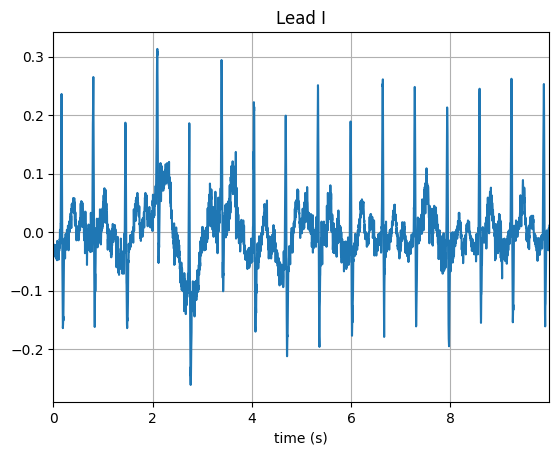

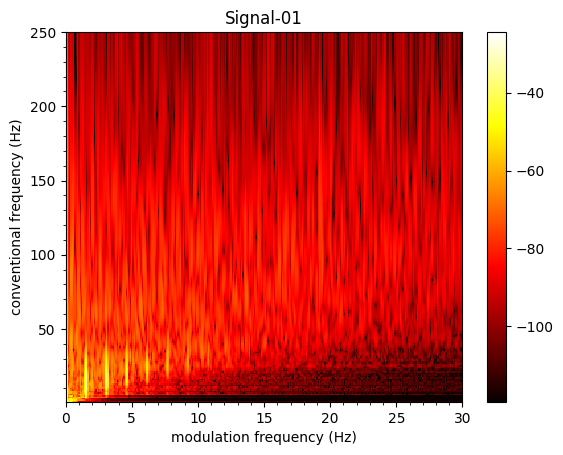

MS QI of the Lead I :  [0.3648512]


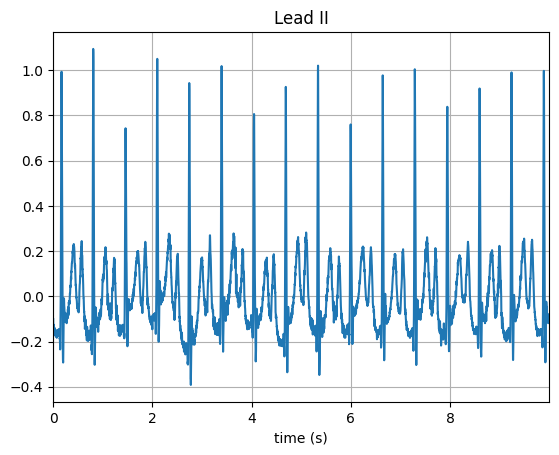

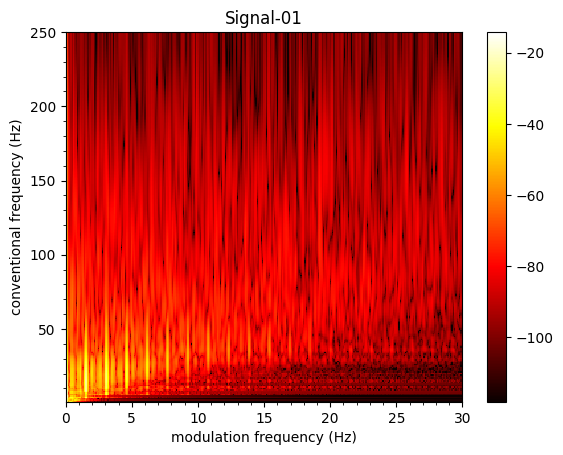

MS QI of the Lead II :  [0.55203829]


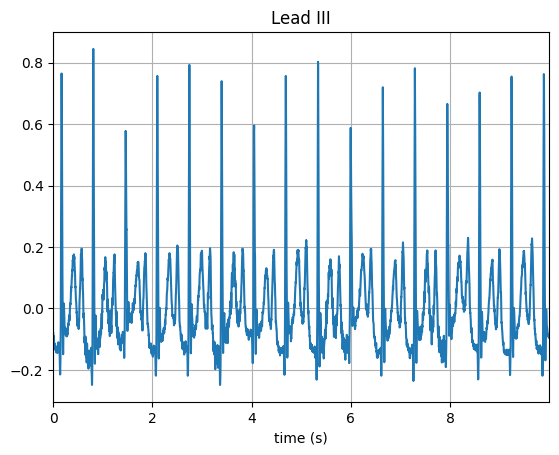

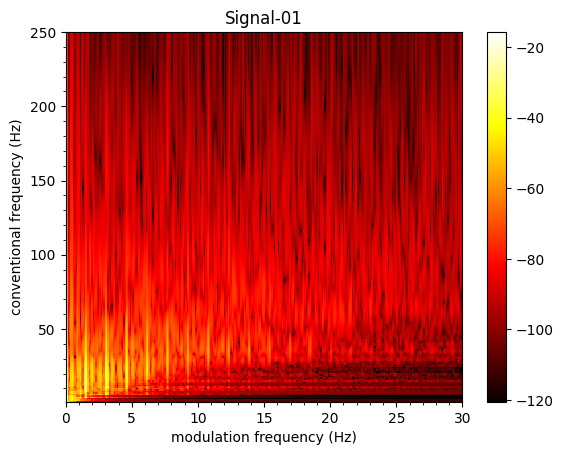

MS QI of the Lead III :  [0.52643805]


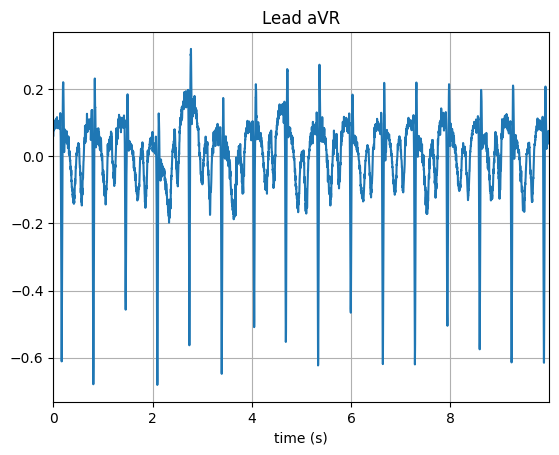

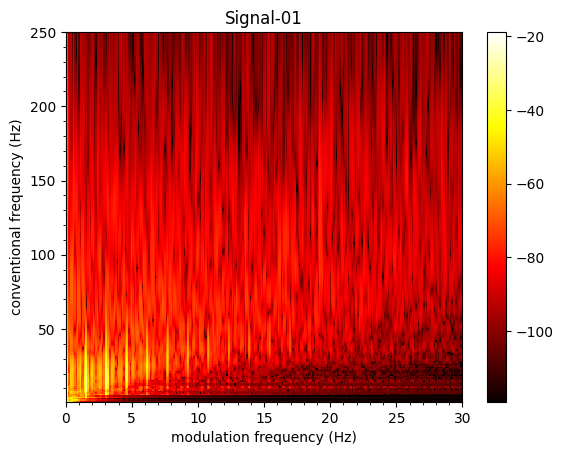

MS QI of the Lead aVR :  [0.50147784]


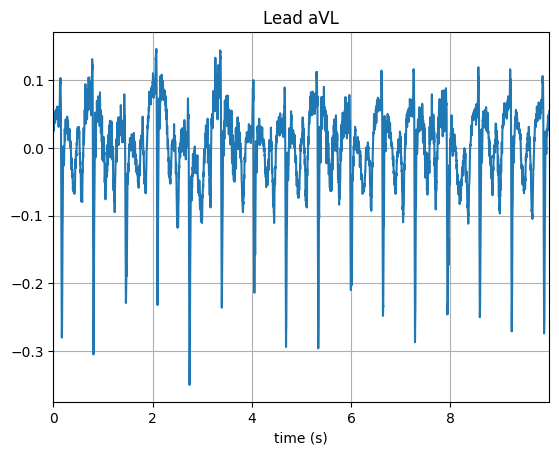

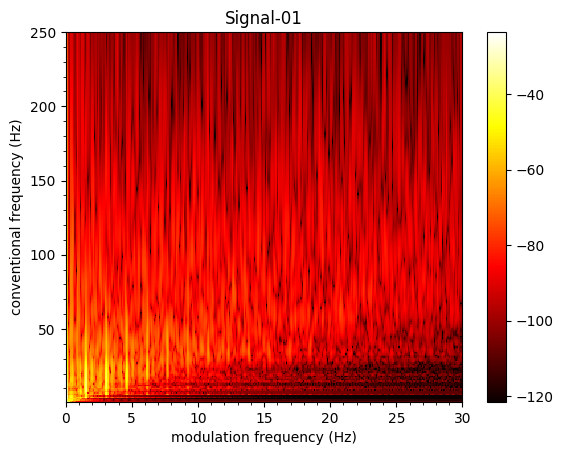

MS QI of the Lead aVL :  [0.33773154]


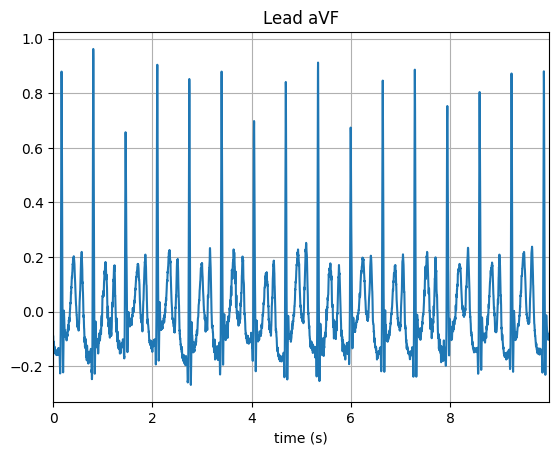

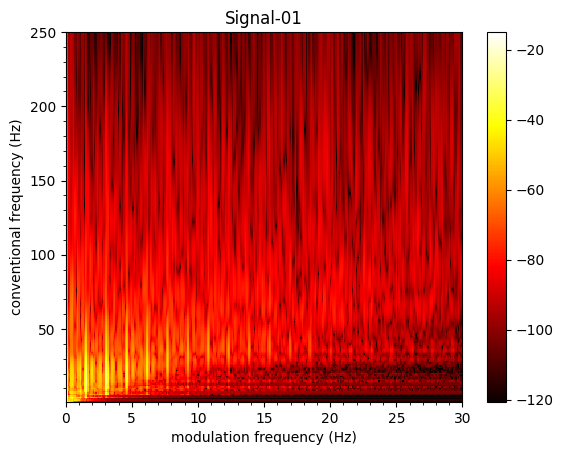

MS QI of the Lead aVF :  [0.56804828]


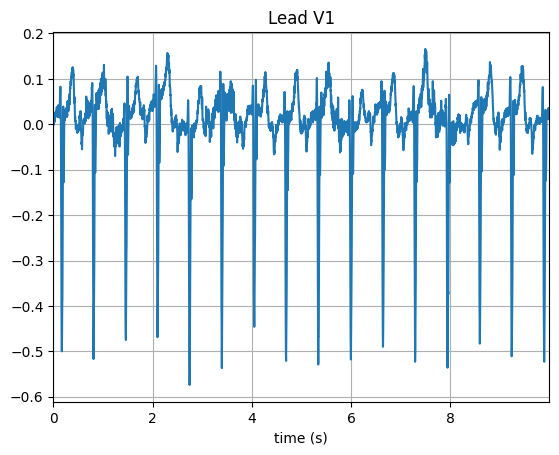

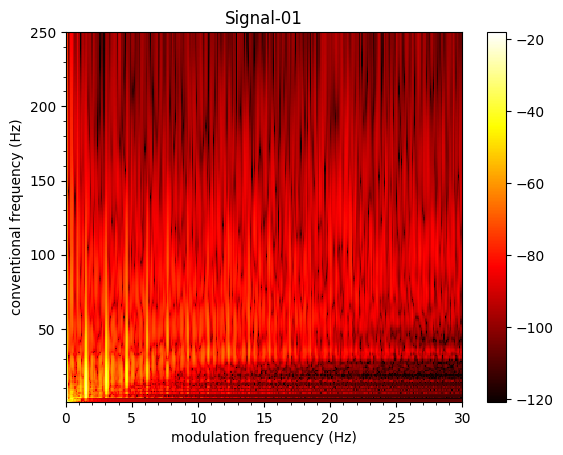

MS QI of the Lead V1 :  [0.59727036]


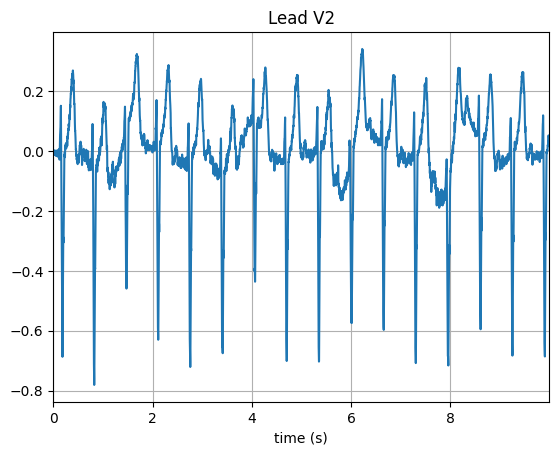

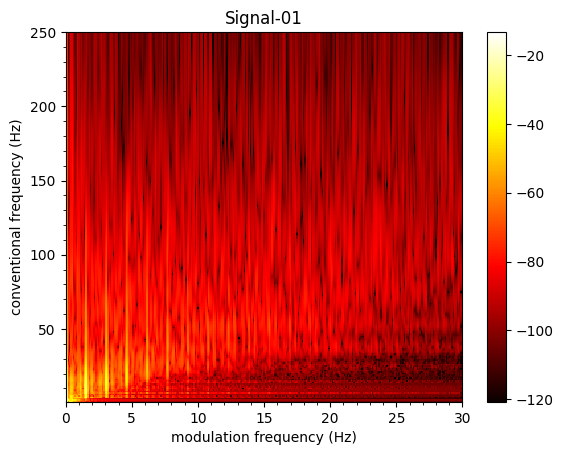

MS QI of the Lead V2 :  [0.55681182]


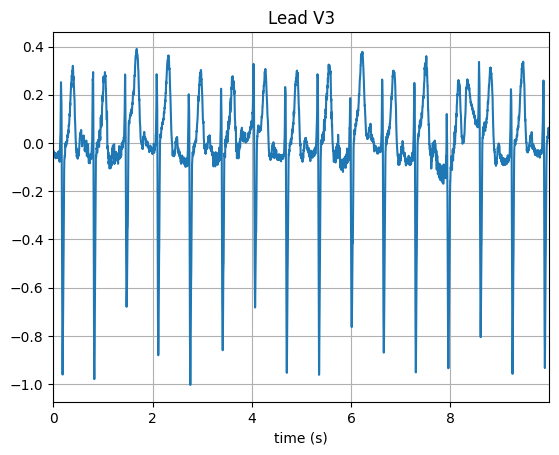

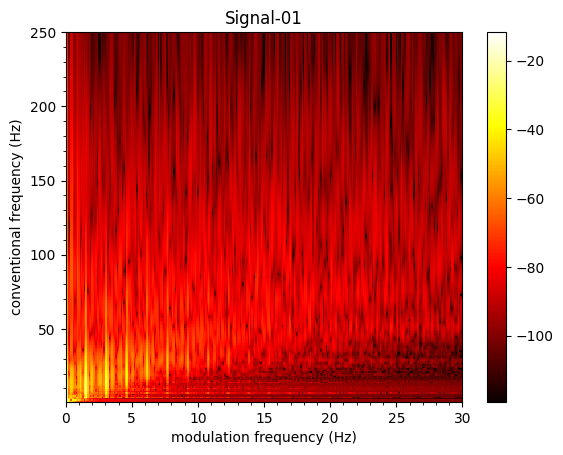

MS QI of the Lead V3 :  [0.69057957]


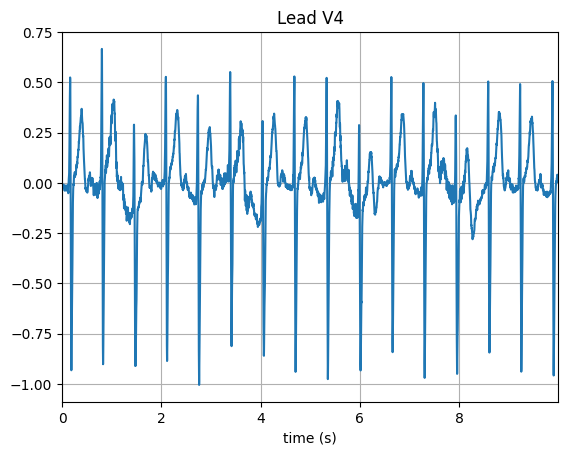

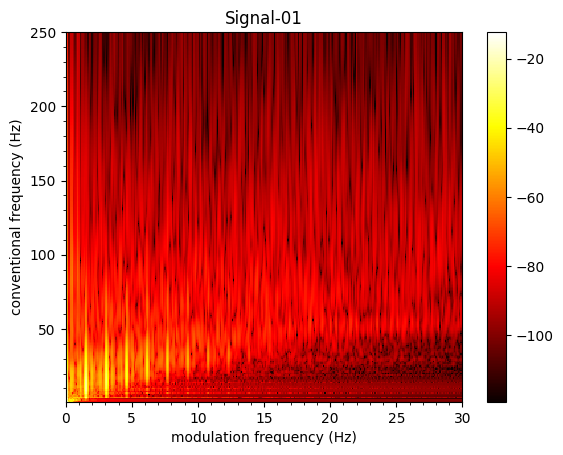

MS QI of the Lead V4 :  [0.65537366]


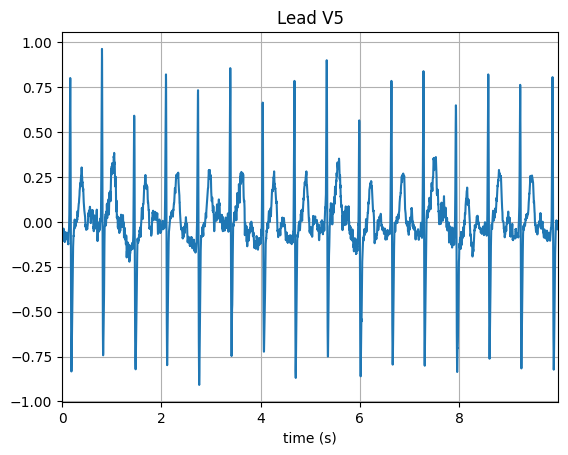

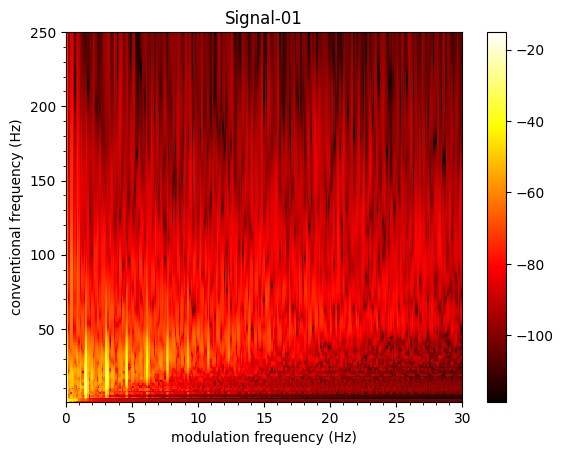

MS QI of the Lead V5 :  [0.67907582]


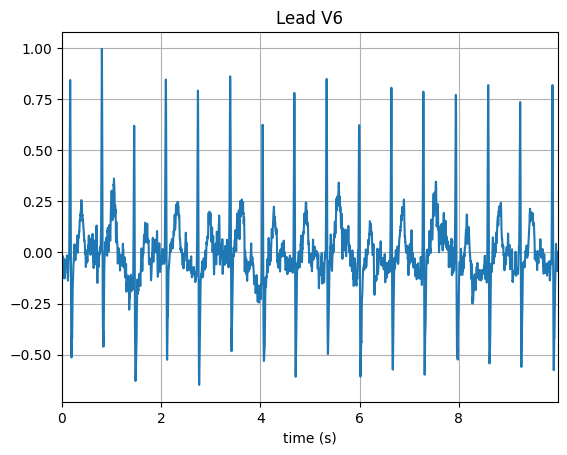

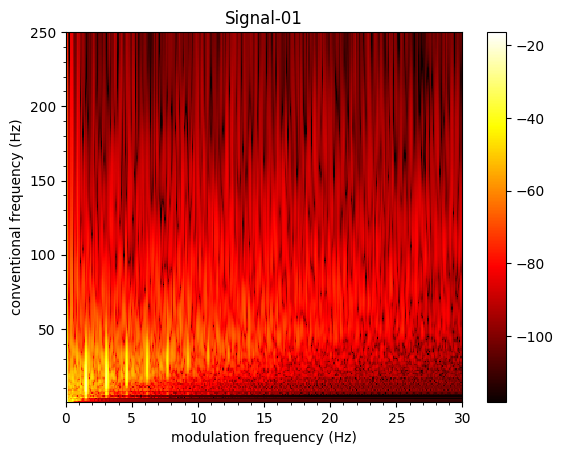

MS QI of the Lead V6 :  [0.55009718]


In [87]:
for i in ECG_lead:
    MSSRw = wavelet_modulation_spectrogram(dico_ECG[i],sample.sampling_frequency)
    plot_signal(dico_ECG[i],sample.sampling_frequency,name = "Lead " + i.decode('utf8'))
    plt.grid()
    plt.show()
    plot_modulation_spectrogram_data(MSSRw,modf_range=np.array([0,30]),c_map="hot")
    plt.show()
    ##MS-QI
    MSQI,_,_ = msqi_ama(dico_ECG[i],sample.sampling_frequency)
    print(f"MS QI of the Lead {i.decode('utf8')} : ",MSQI)
